In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\study materials\python\02 Machine Learning - Udemy\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

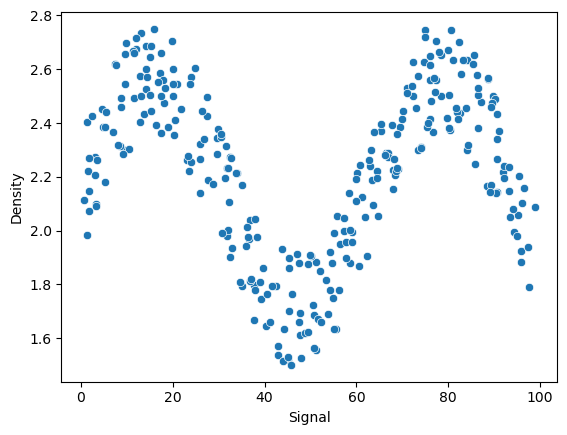

In [5]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [6]:
X = df['Signal'].values.reshape(-1,1)

In [7]:
y = df['Density']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr_model = LinearRegression()

In [12]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
lr_preds = lr_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [16]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [17]:
signal_range = np.arange(0,100)

In [18]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [19]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [20]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

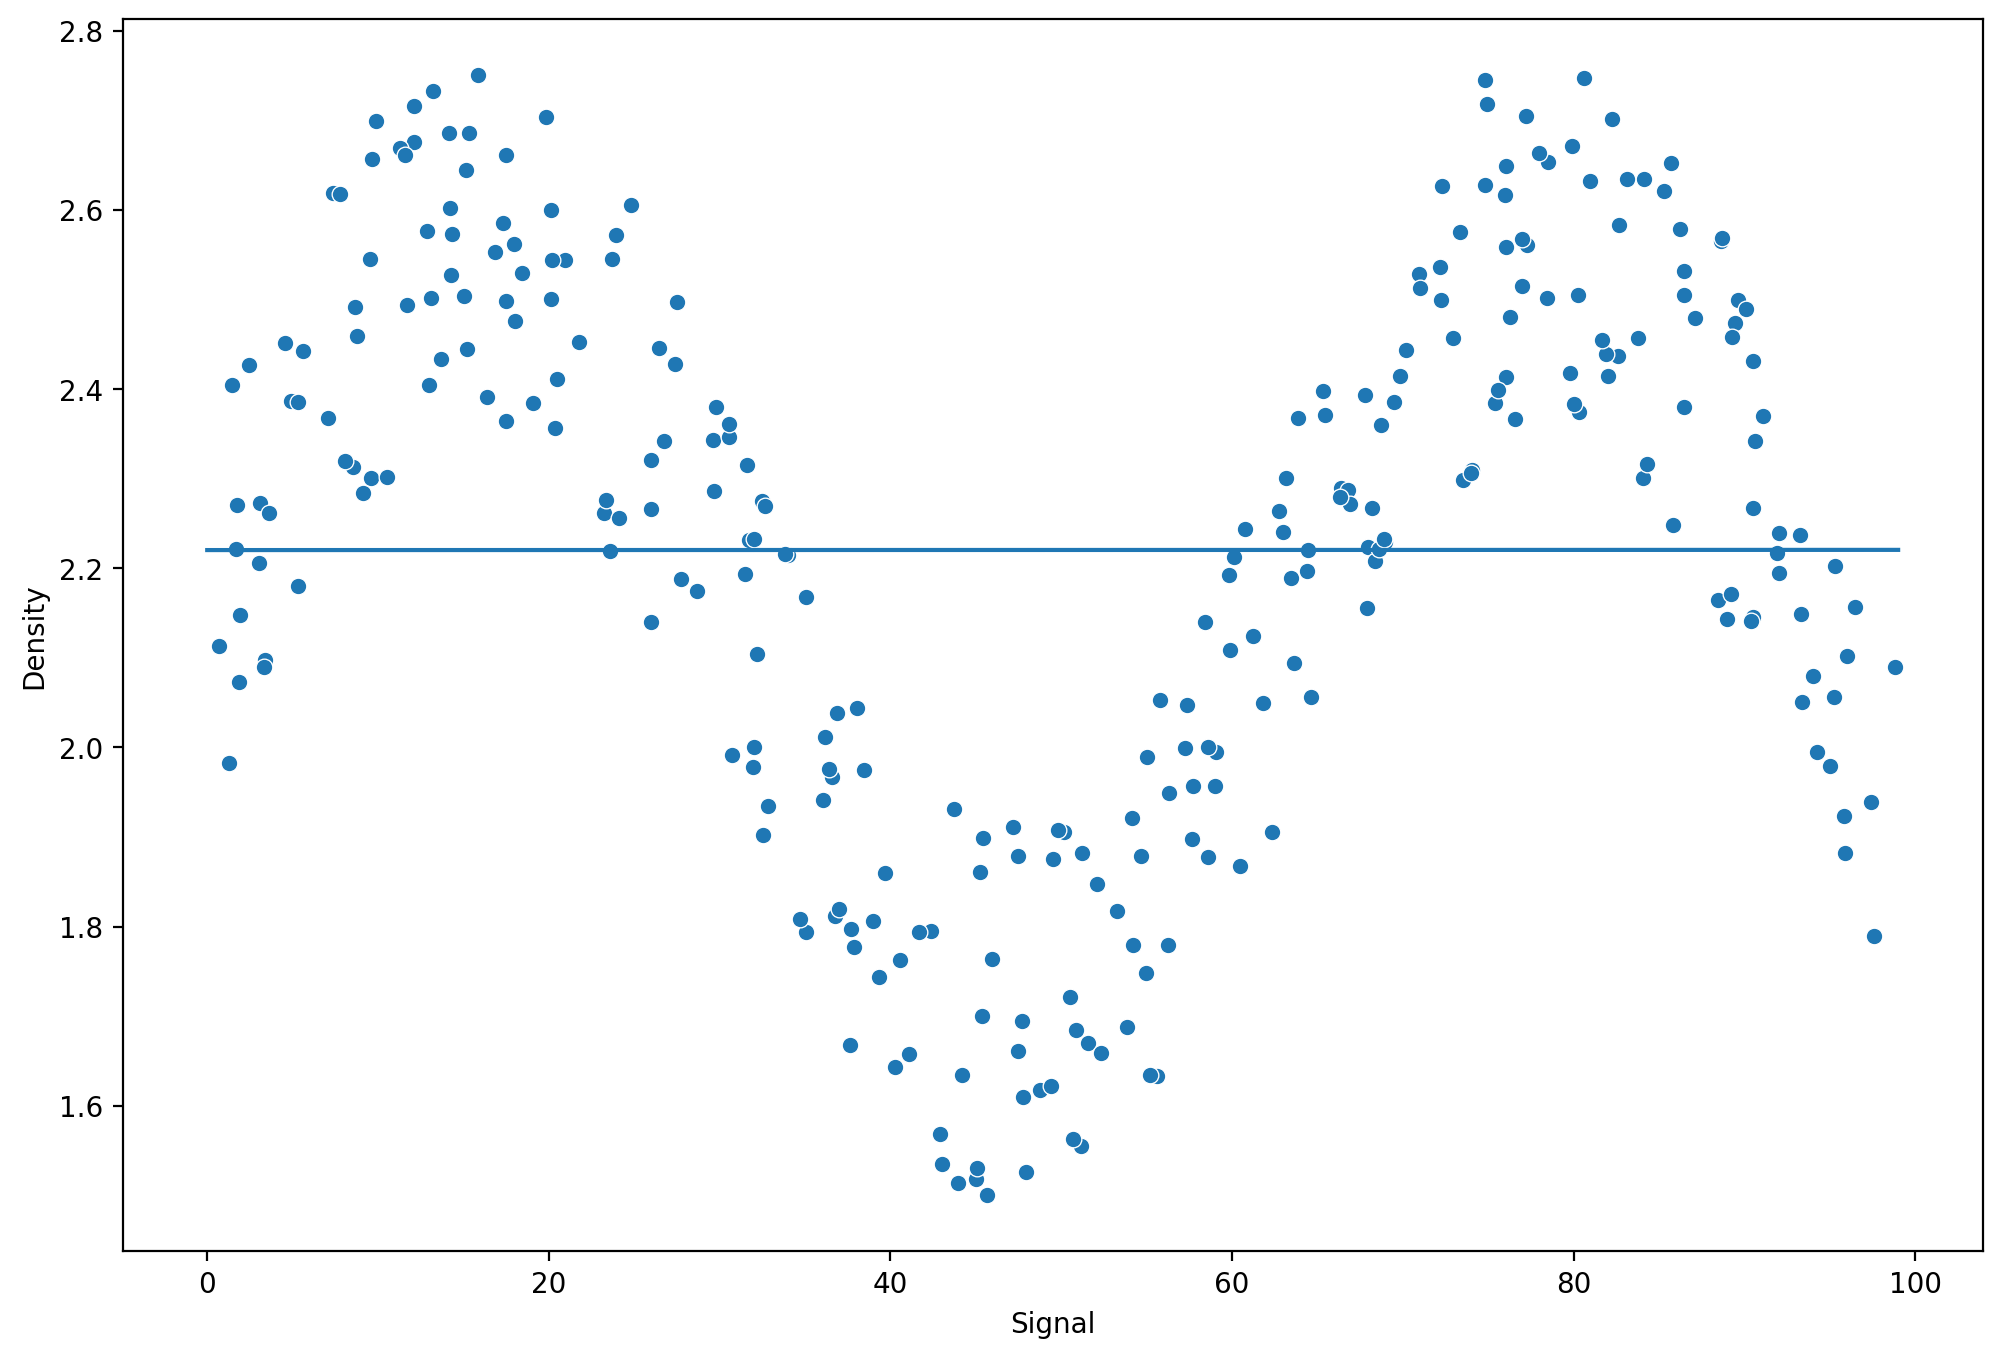

In [21]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_range,signal_preds)

In [22]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    #Fit model training
    model.fit(X_train,y_train)
    
    #Get metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE : {mae}')
    print(f'RMSE : {rmse}')
    
    # Plot results model signal range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,signal_preds)

In [23]:
model = LinearRegression()

MAE : 0.211198973318633
RMSE : 0.2570051996584629


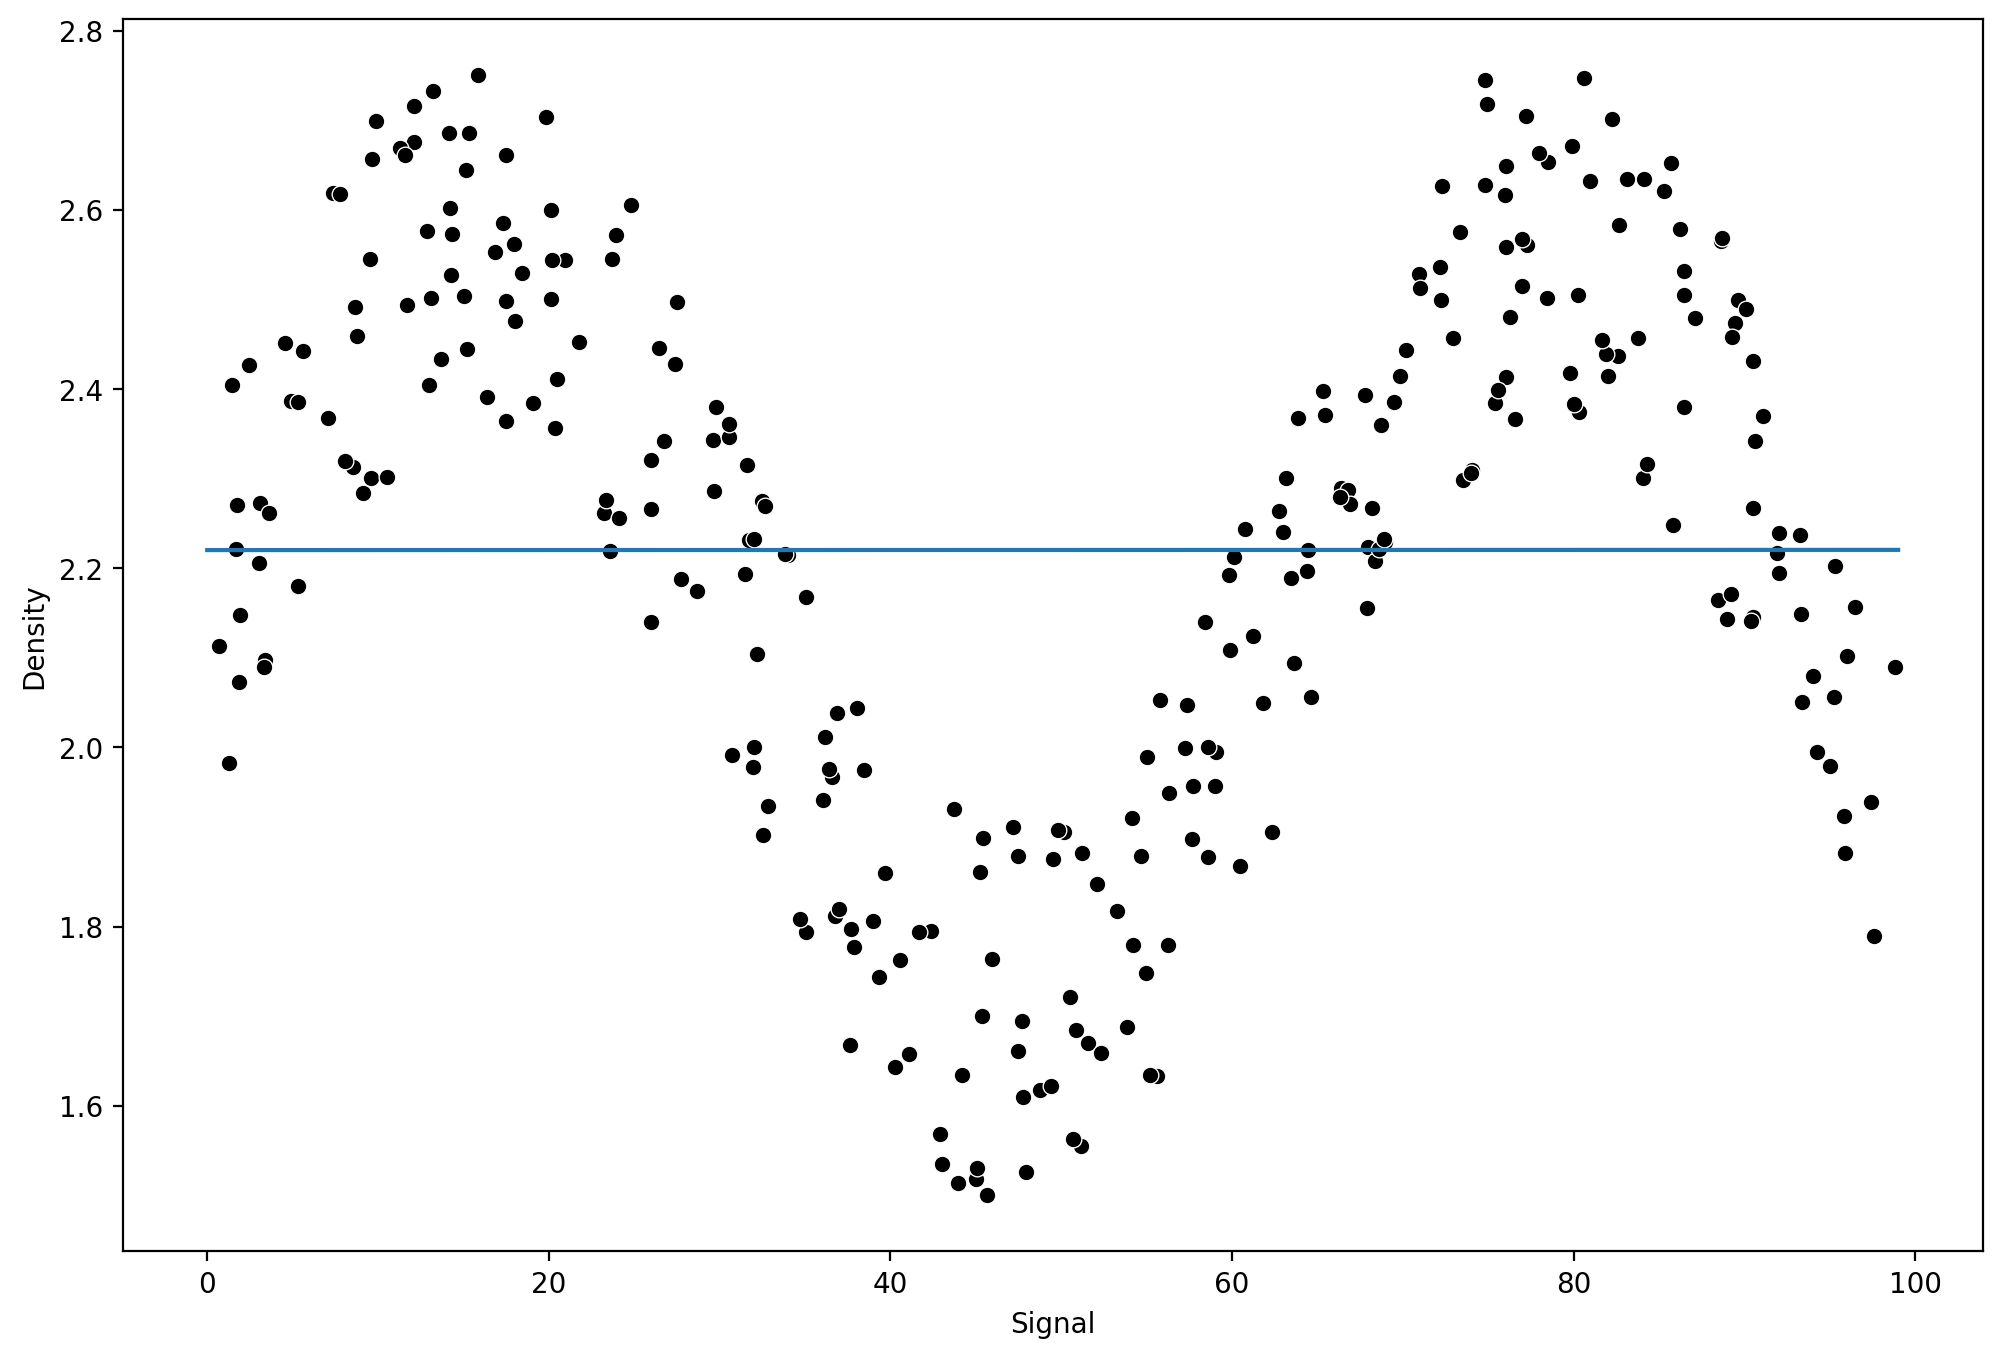

In [24]:
run_model(model,X_train,y_train,X_test,y_test)

In [25]:
from sklearn.pipeline import make_pipeline

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

MAE : 0.22903105443511274
RMSE : 0.2817309563725583


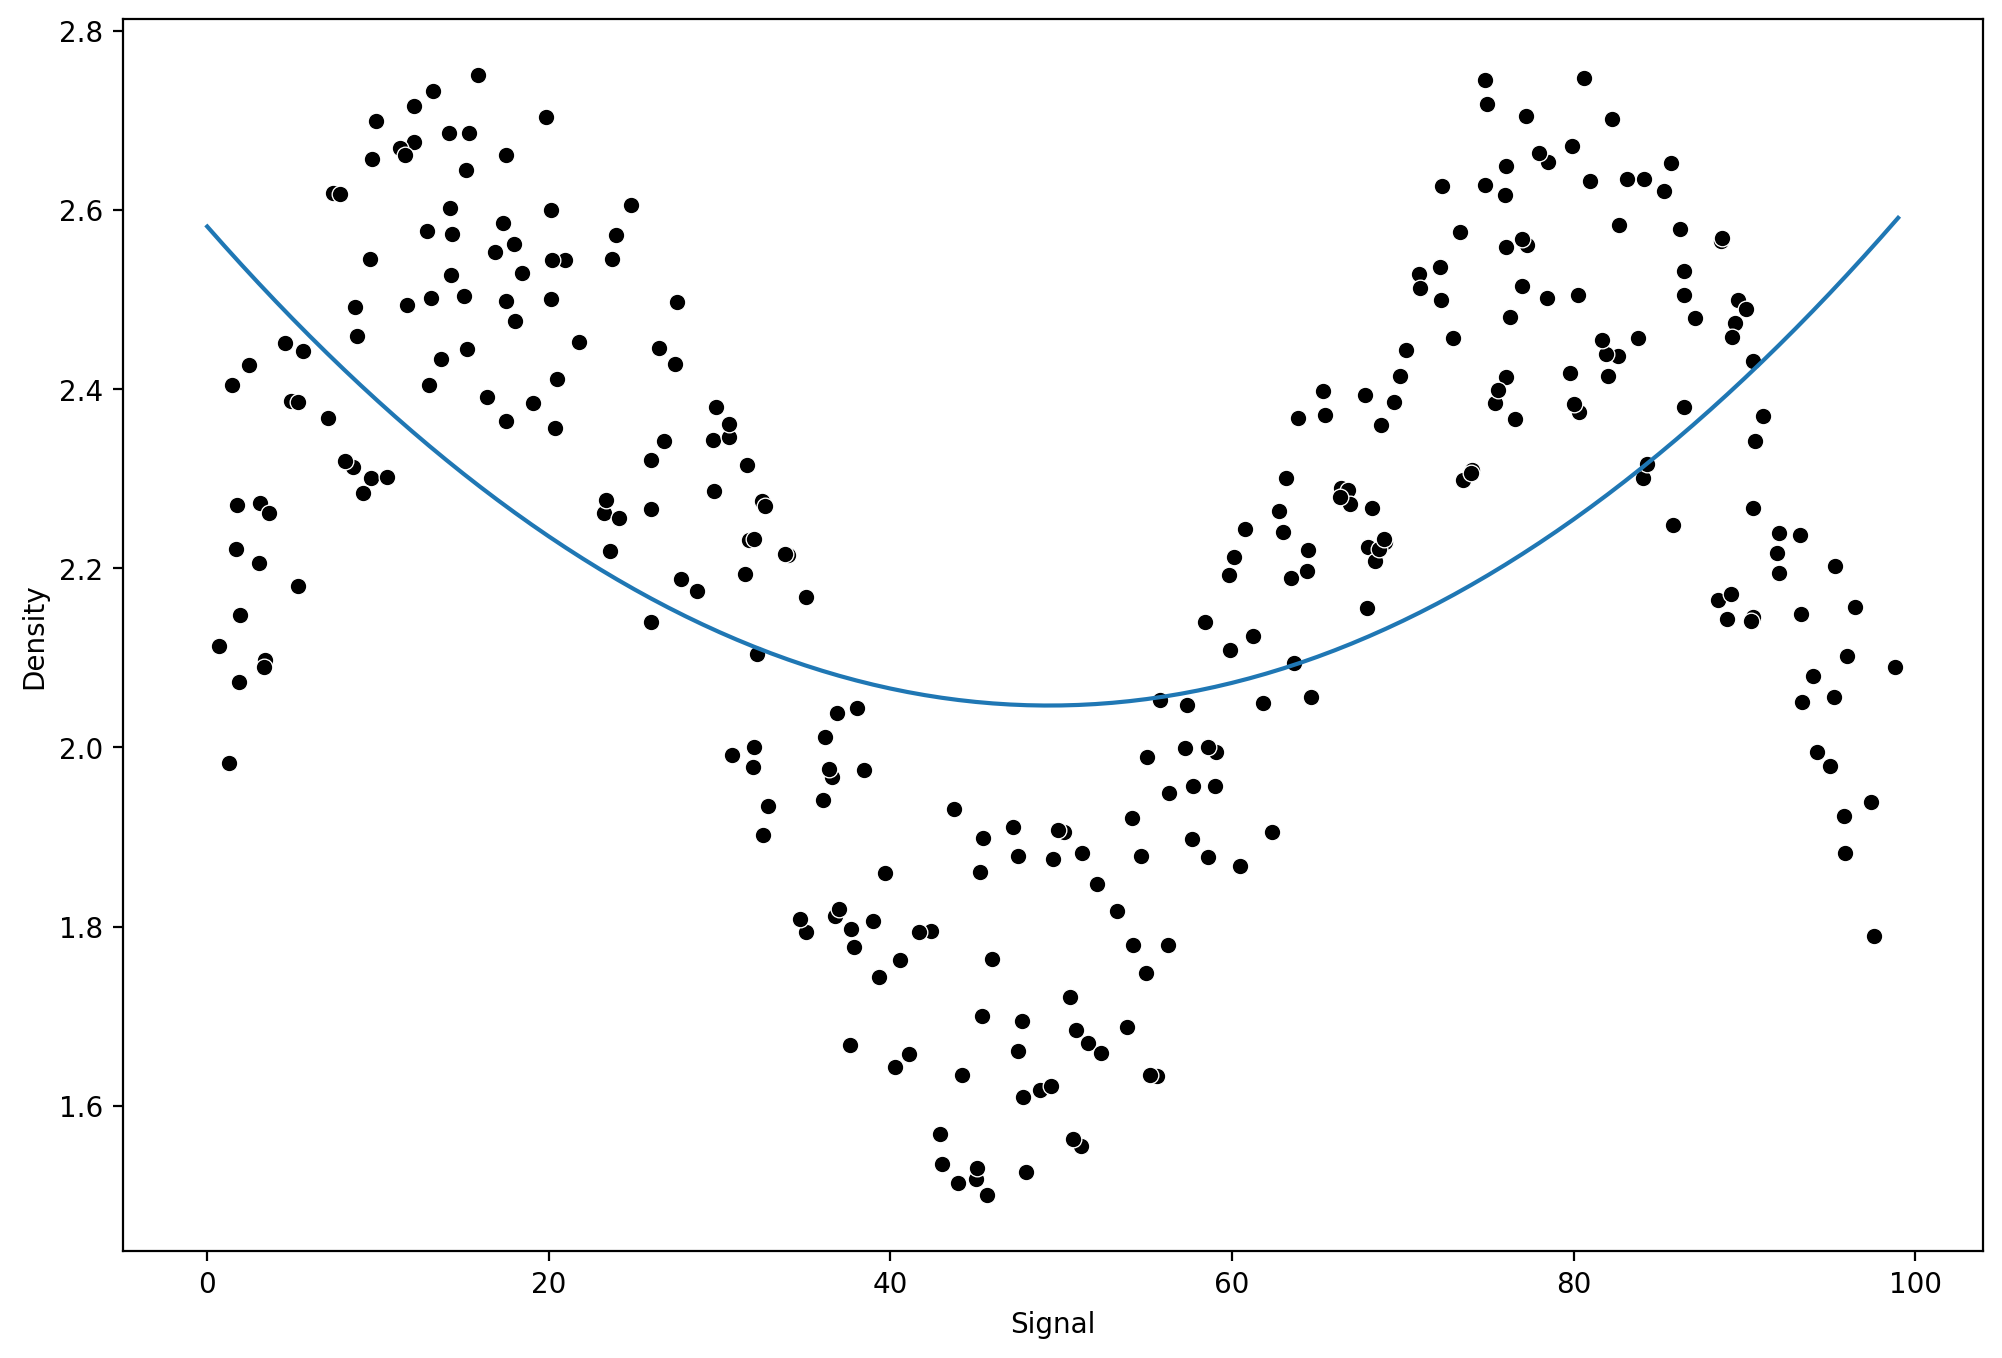

In [28]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [29]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE : 0.11969072819722383
RMSE : 0.13807364110088297


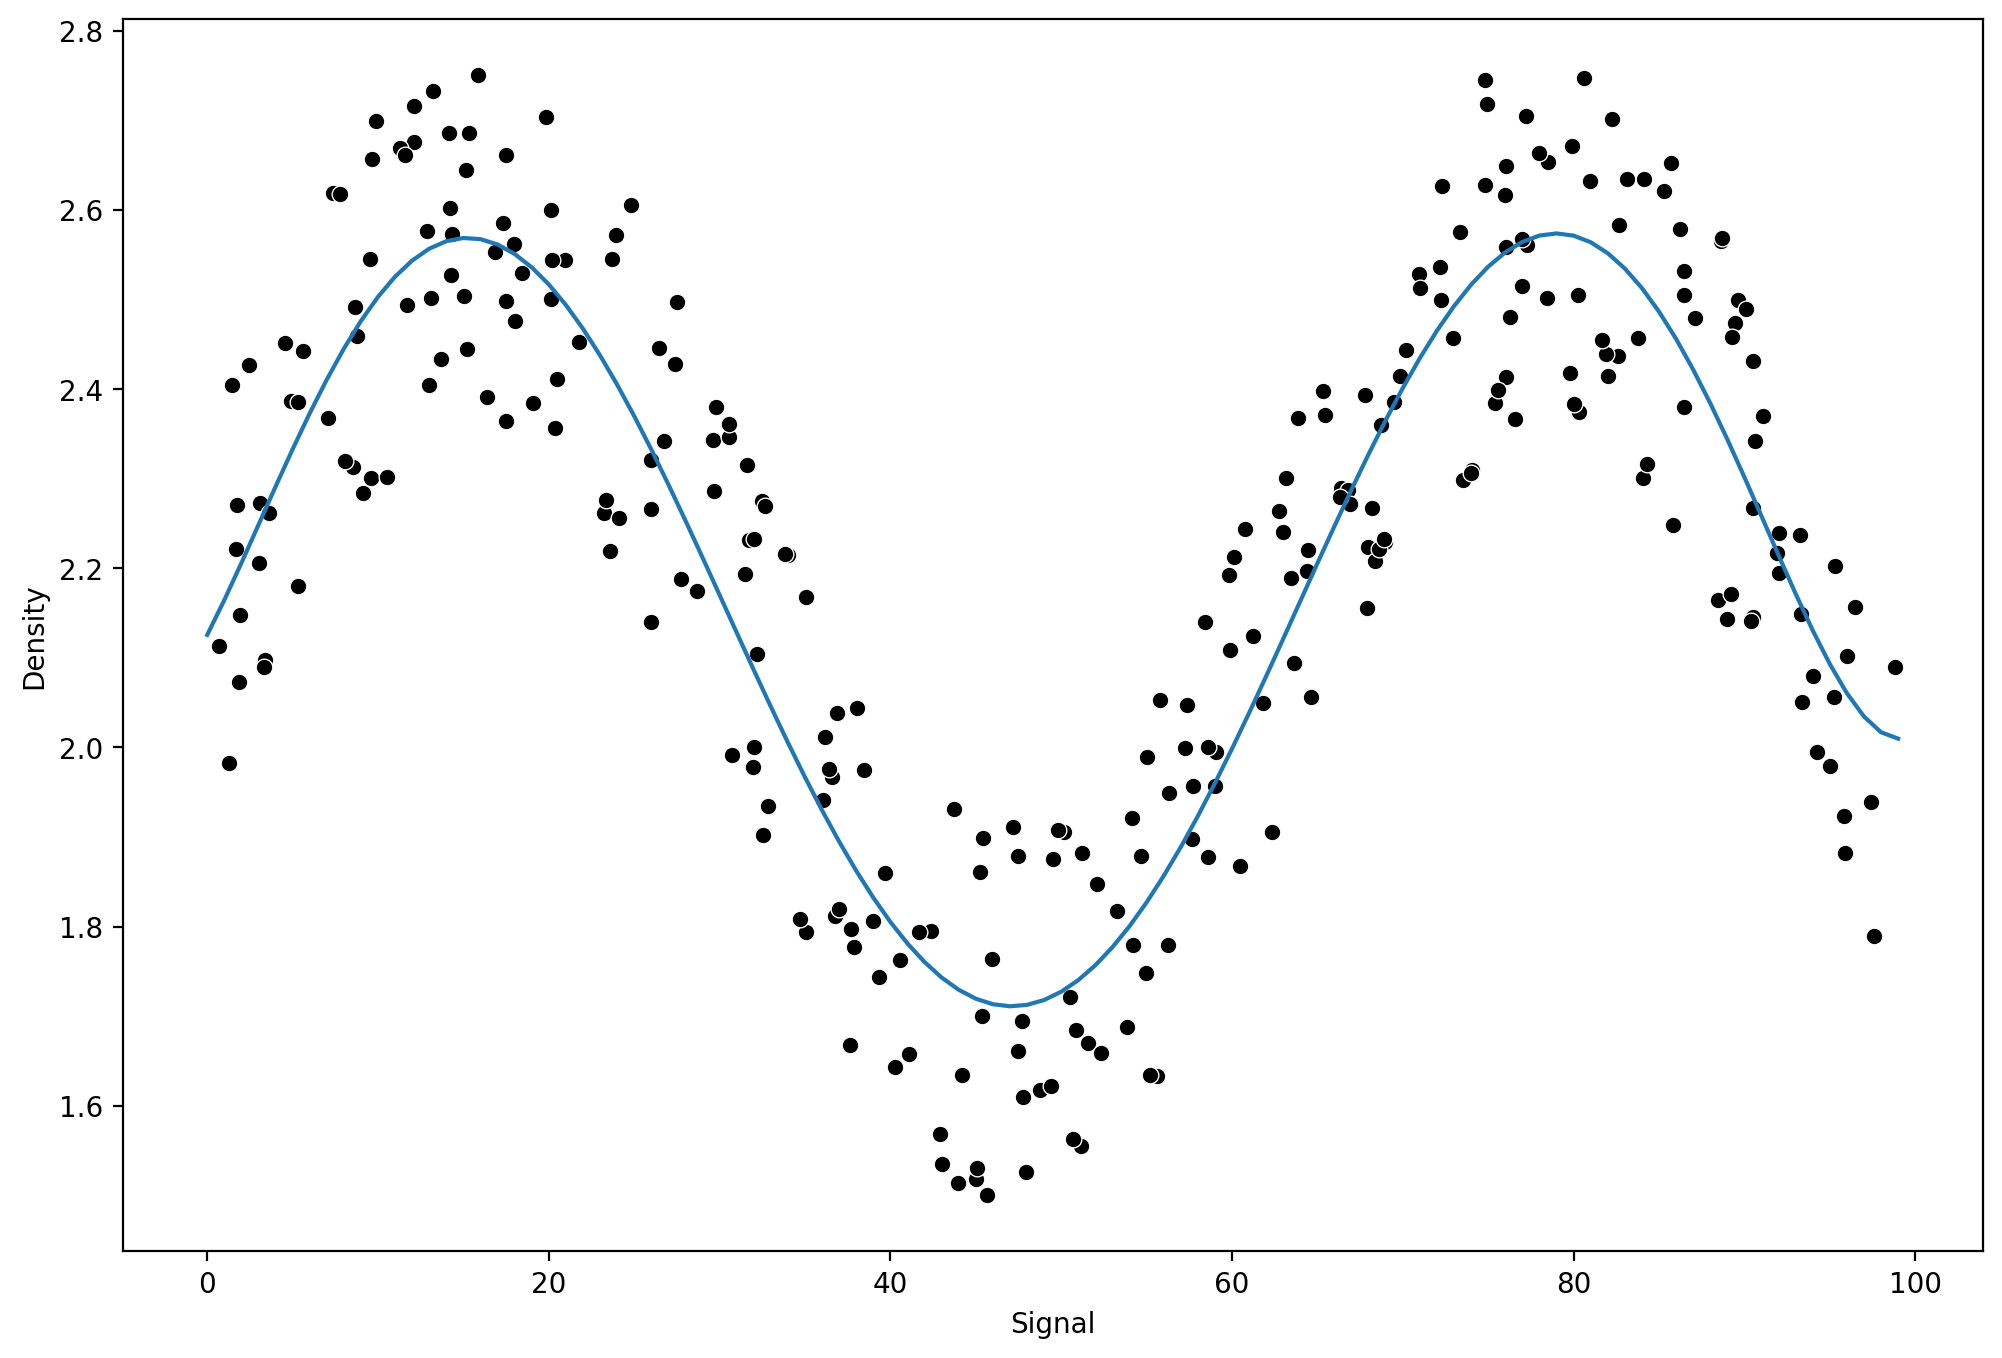

In [30]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [31]:
pipe = make_pipeline(PolynomialFeatures(degree=10),LinearRegression())

MAE : 0.1246742990306469
RMSE : 0.14035390614998972


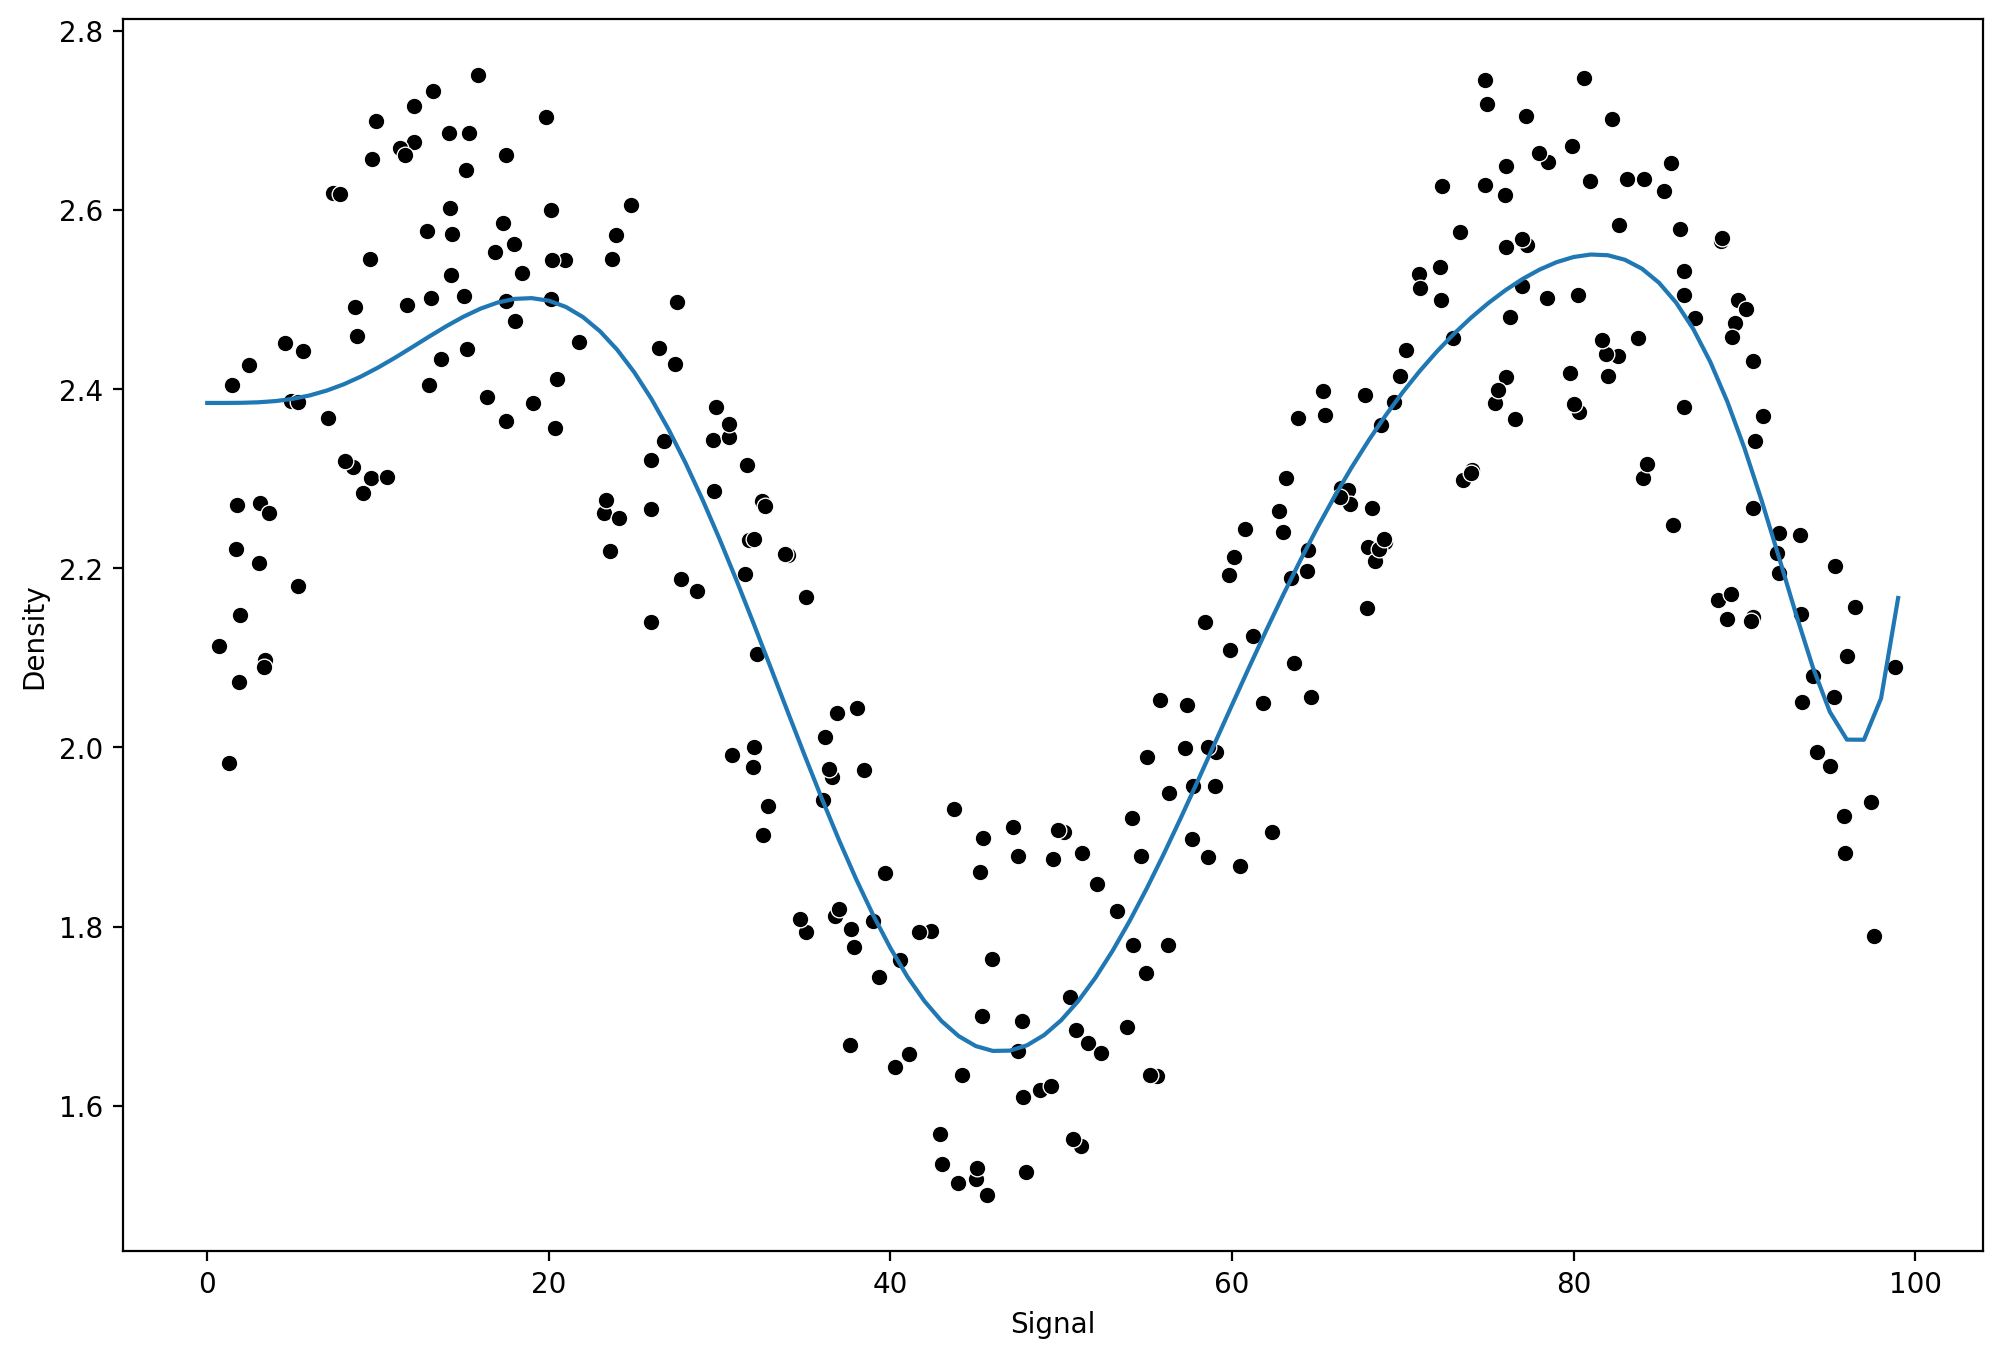

In [32]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [33]:
pipe = make_pipeline(PolynomialFeatures(degree=25),LinearRegression())

MAE : 0.20988580172743265
RMSE : 0.2568582074389766


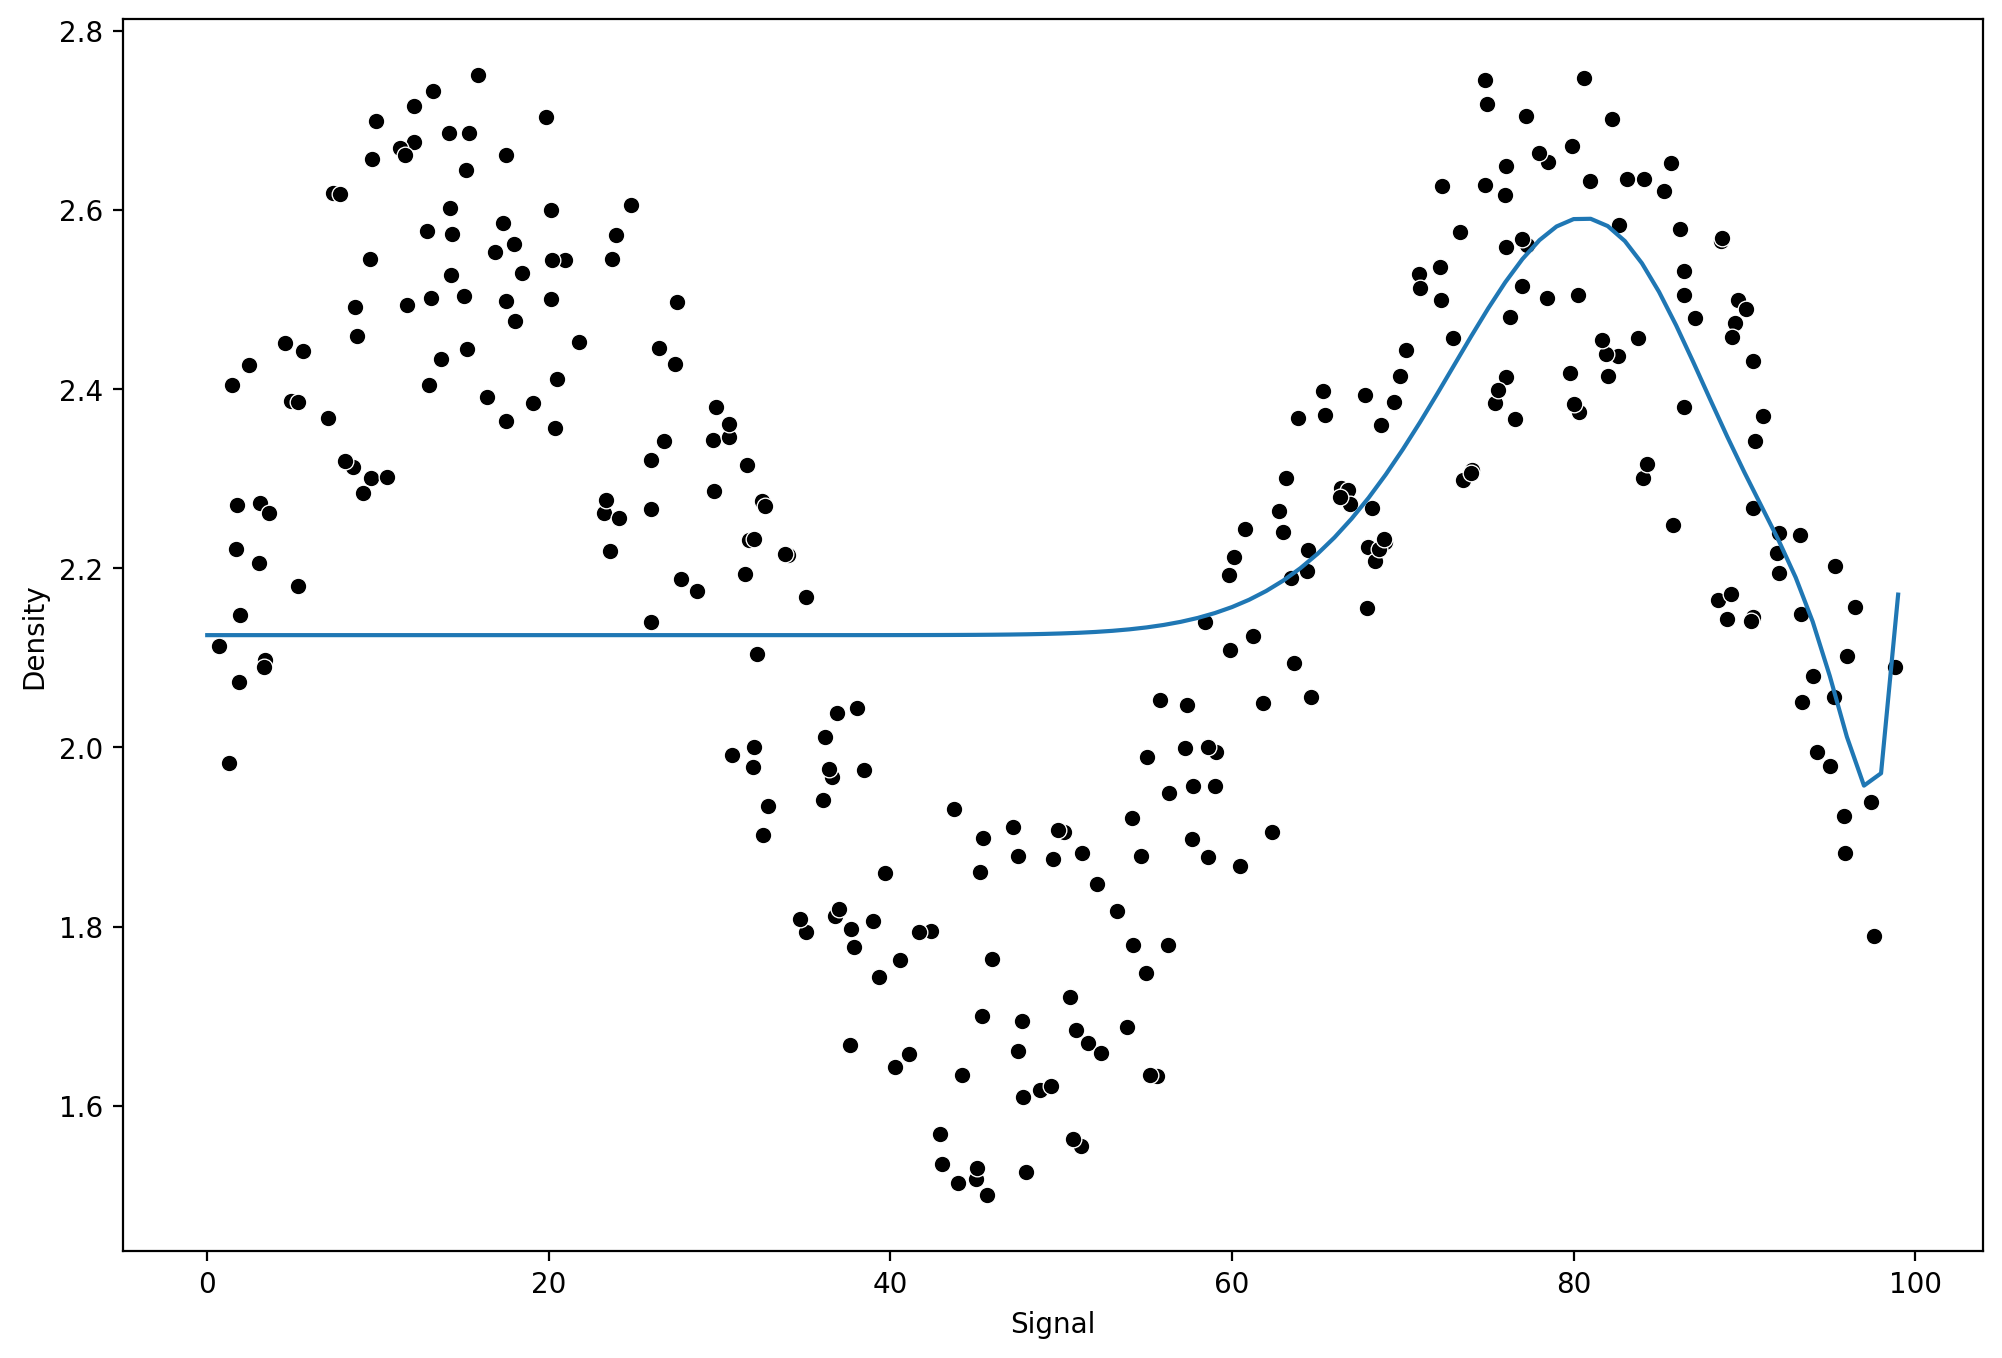

In [34]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
k_values = [1,5,10]

MAE : 0.11877297474442378
RMSE : 0.1523487028635337
MAE : 0.12198383614100558
RMSE : 0.13730685016923647
MAE : 0.11635971693292672
RMSE : 0.13277855732740926


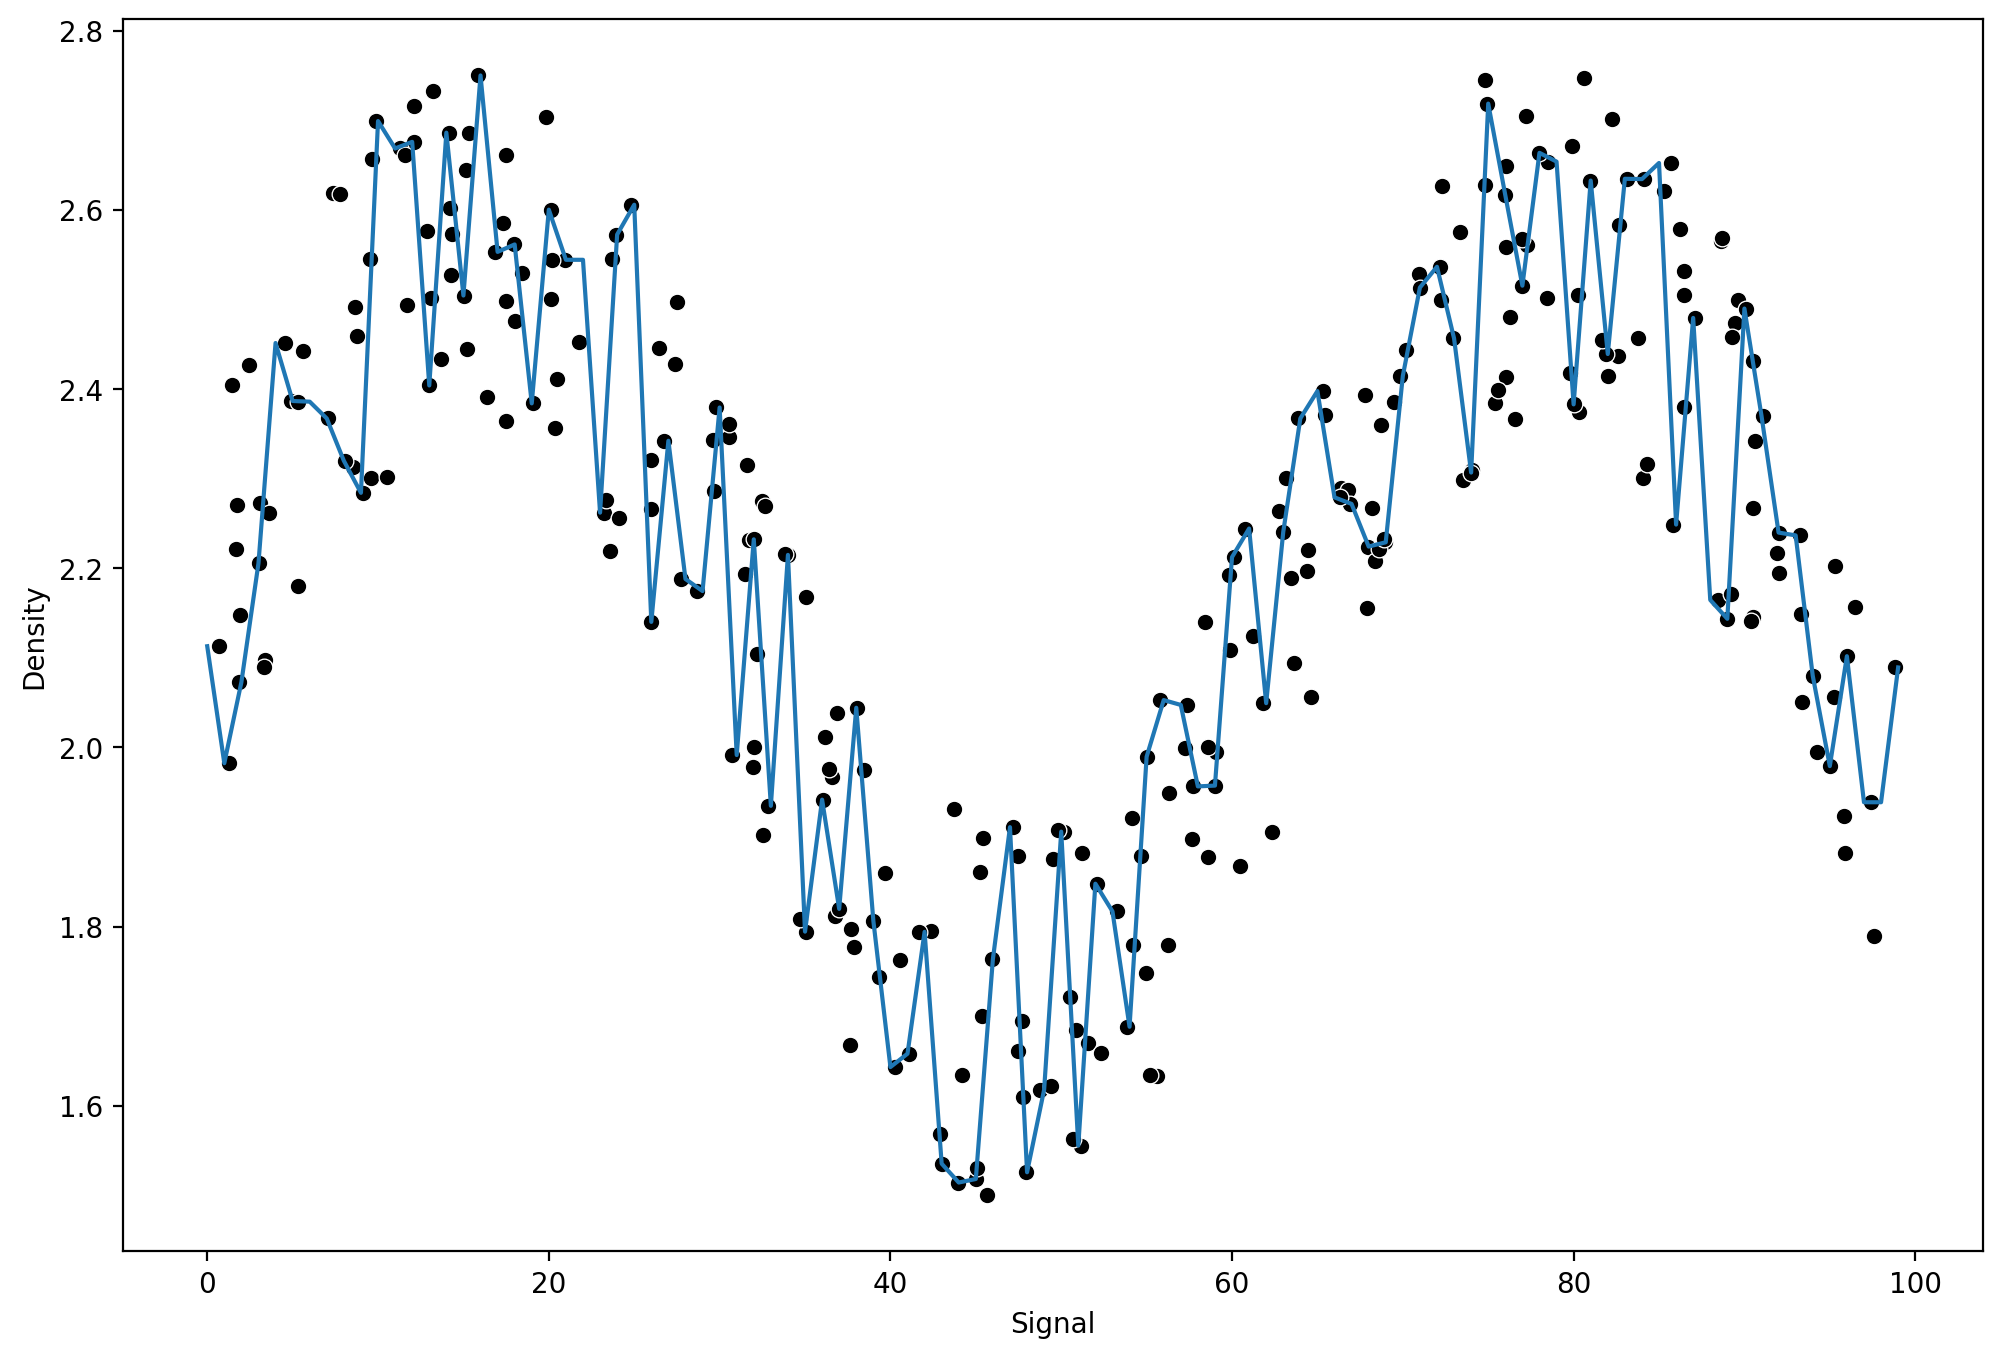

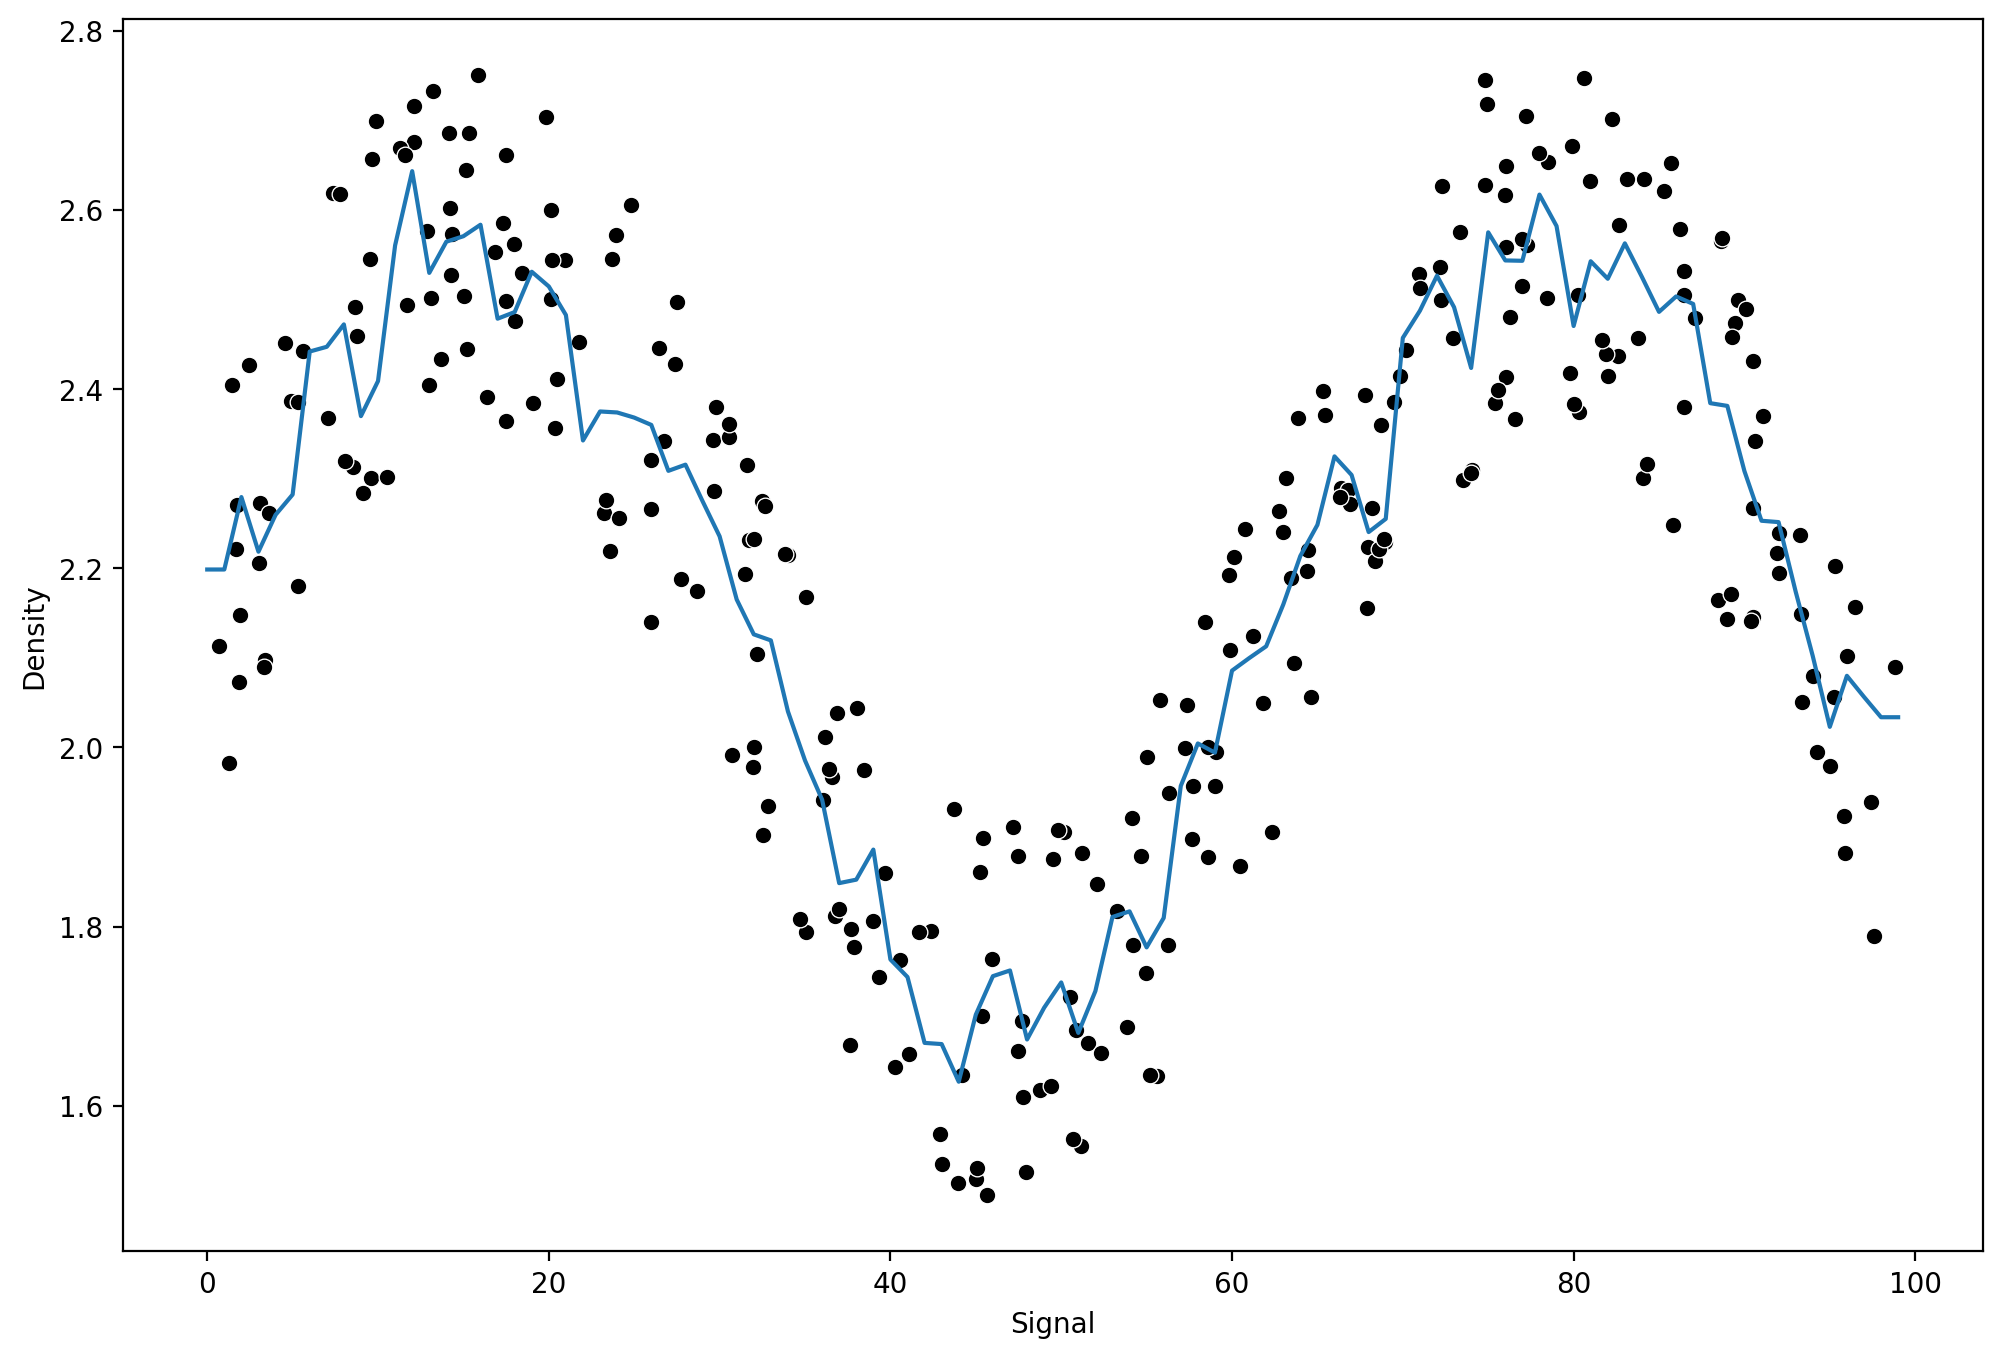

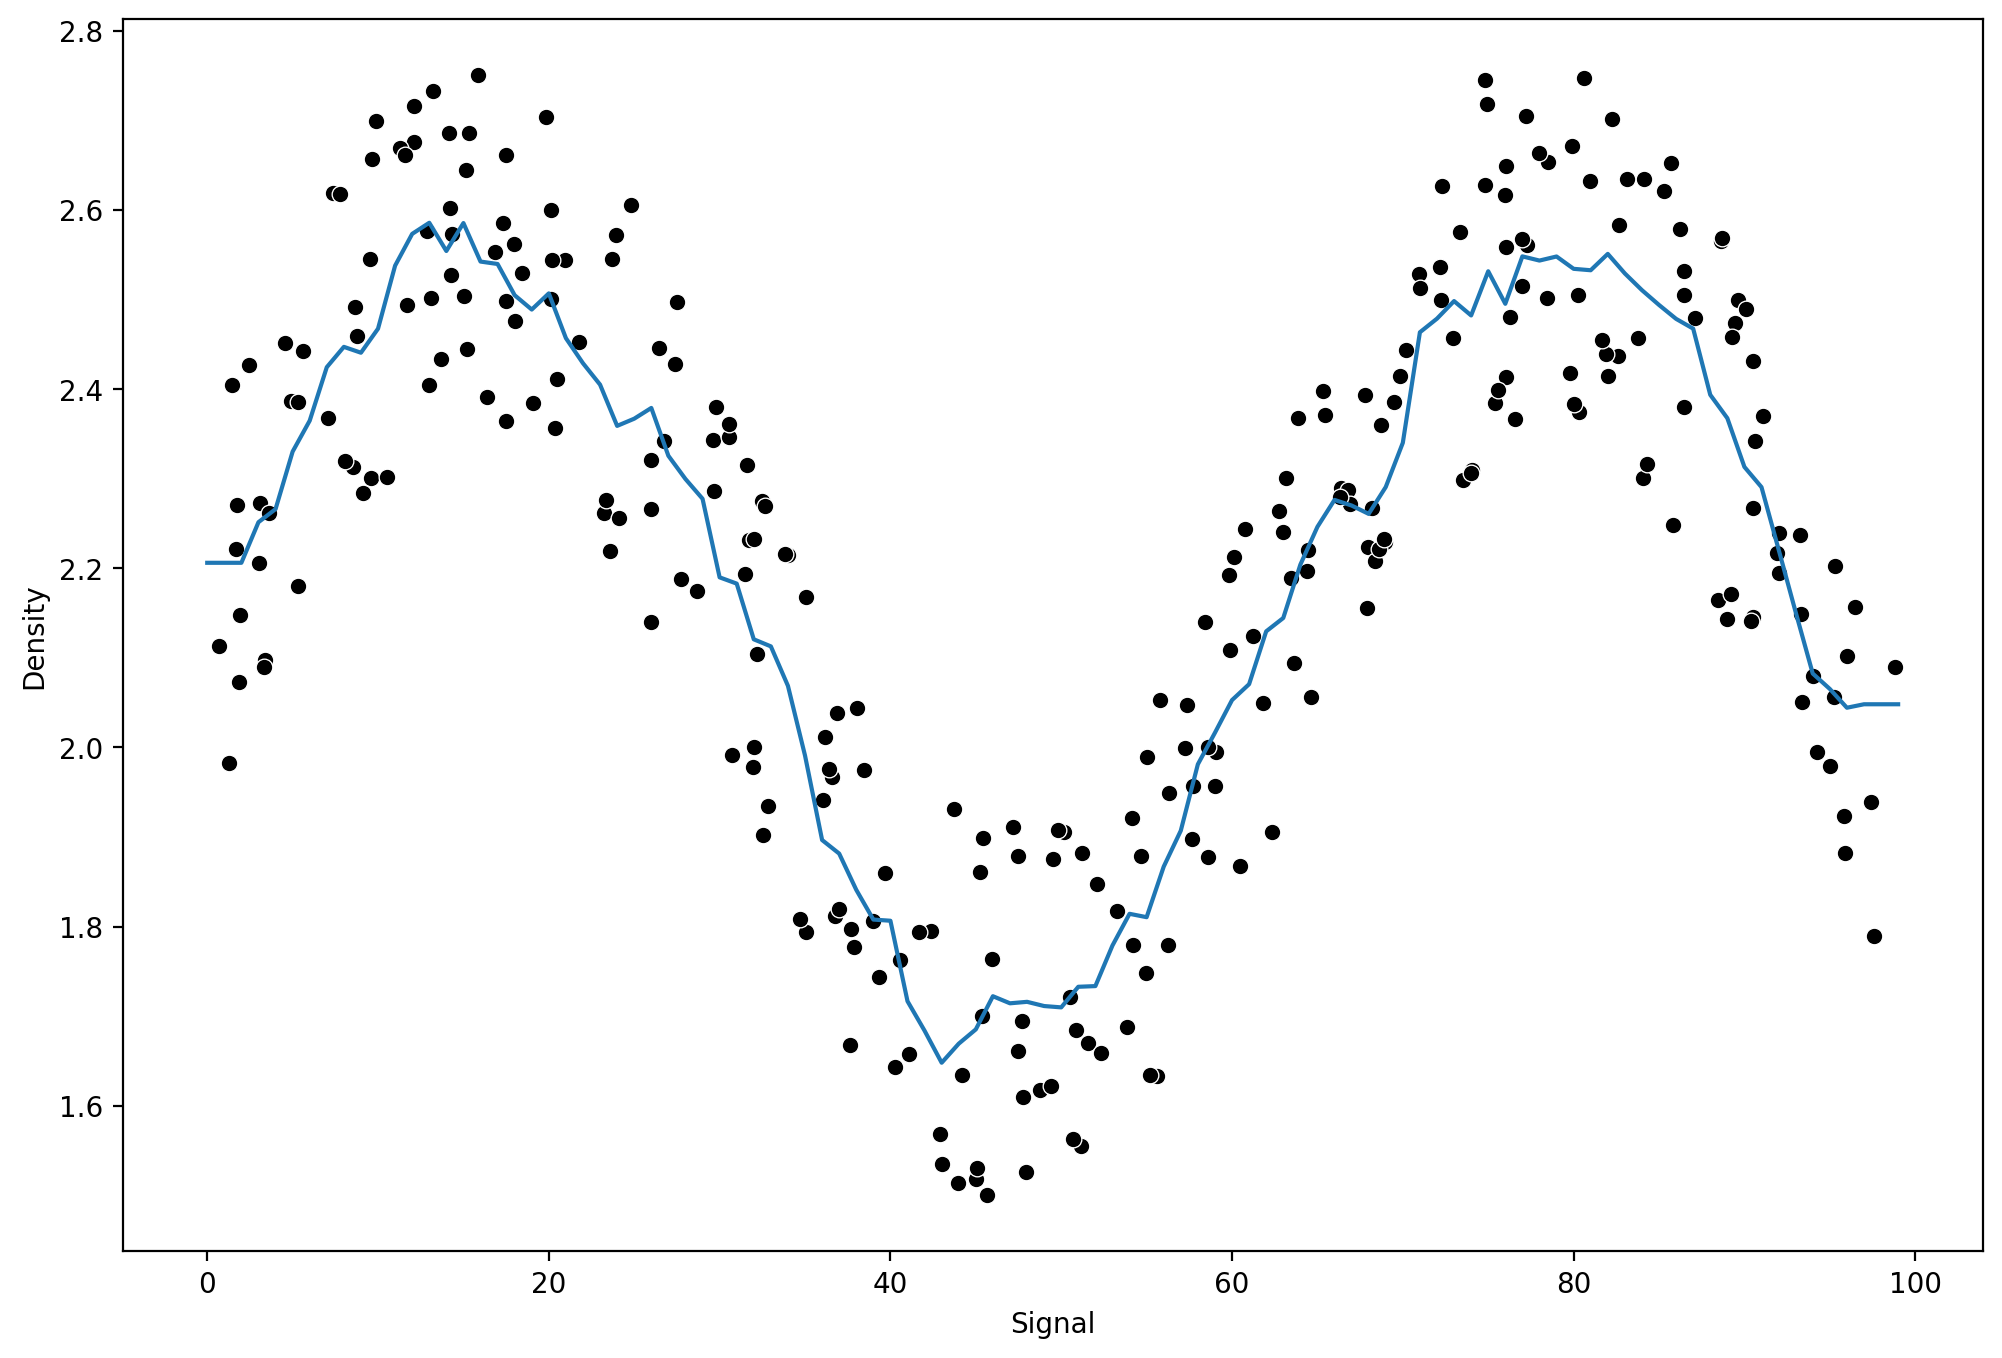

In [37]:
for n in k_values:
    model  = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
model = DecisionTreeRegressor()

MAE : 0.11877297474442378
RMSE : 0.1523487028635337


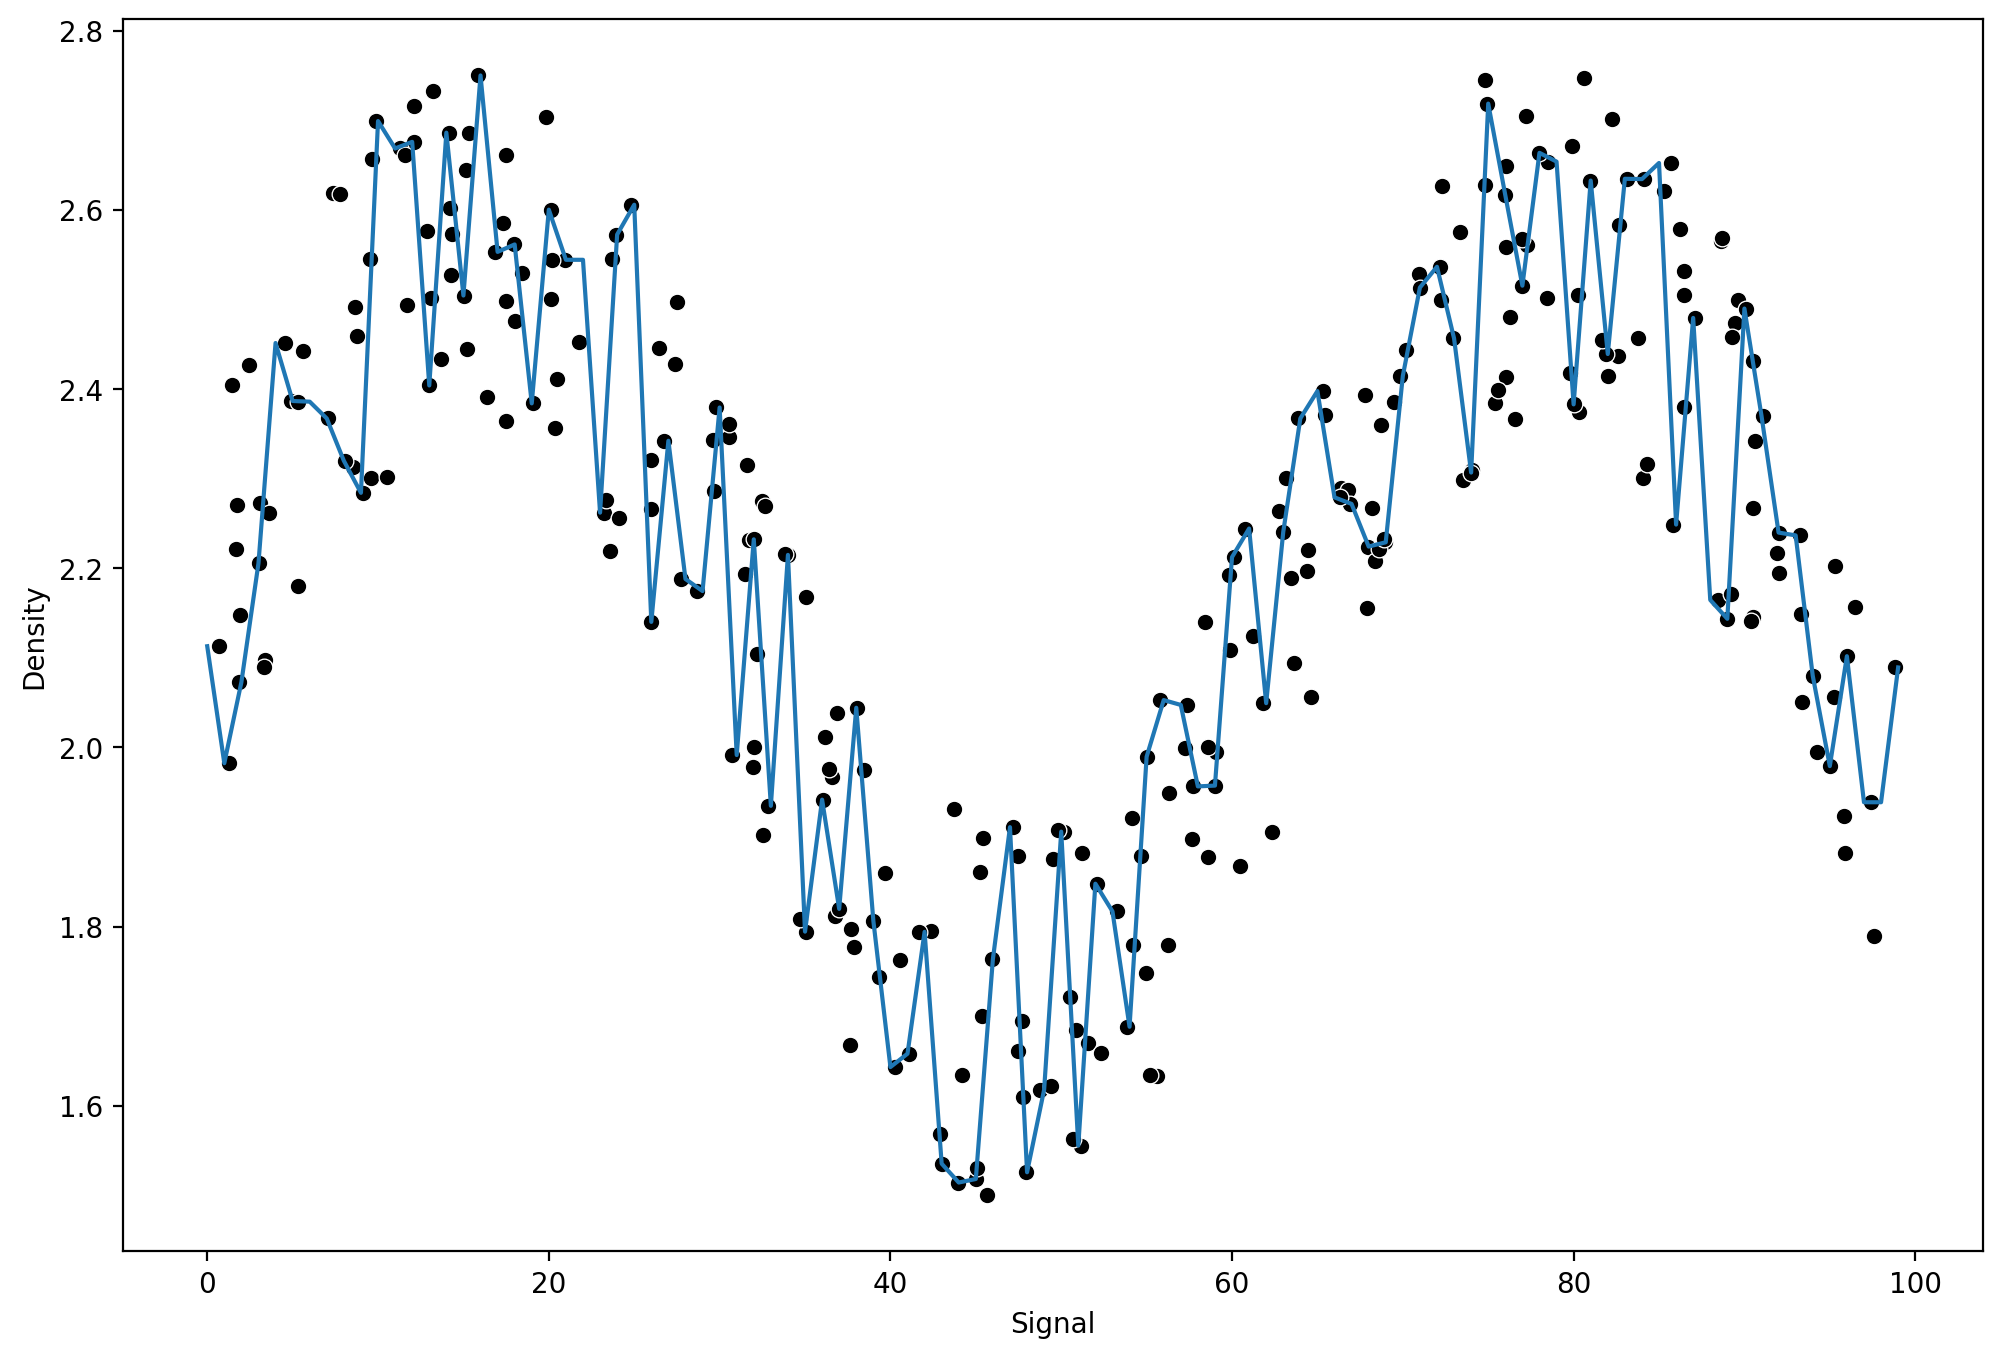

In [40]:
run_model(model,X_train,y_train,X_test,y_test)

In [42]:
from sklearn.svm import SVR

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
svr = SVR()

In [46]:
param_grid = {'C': [0.01,0.1,5,10,100,1000],
             'gamma' :['auto','scale']}

In [48]:
grid = GridSearchCV(svr,param_grid)

MAE : 0.10854210121348368
RMSE : 0.12646999302046696


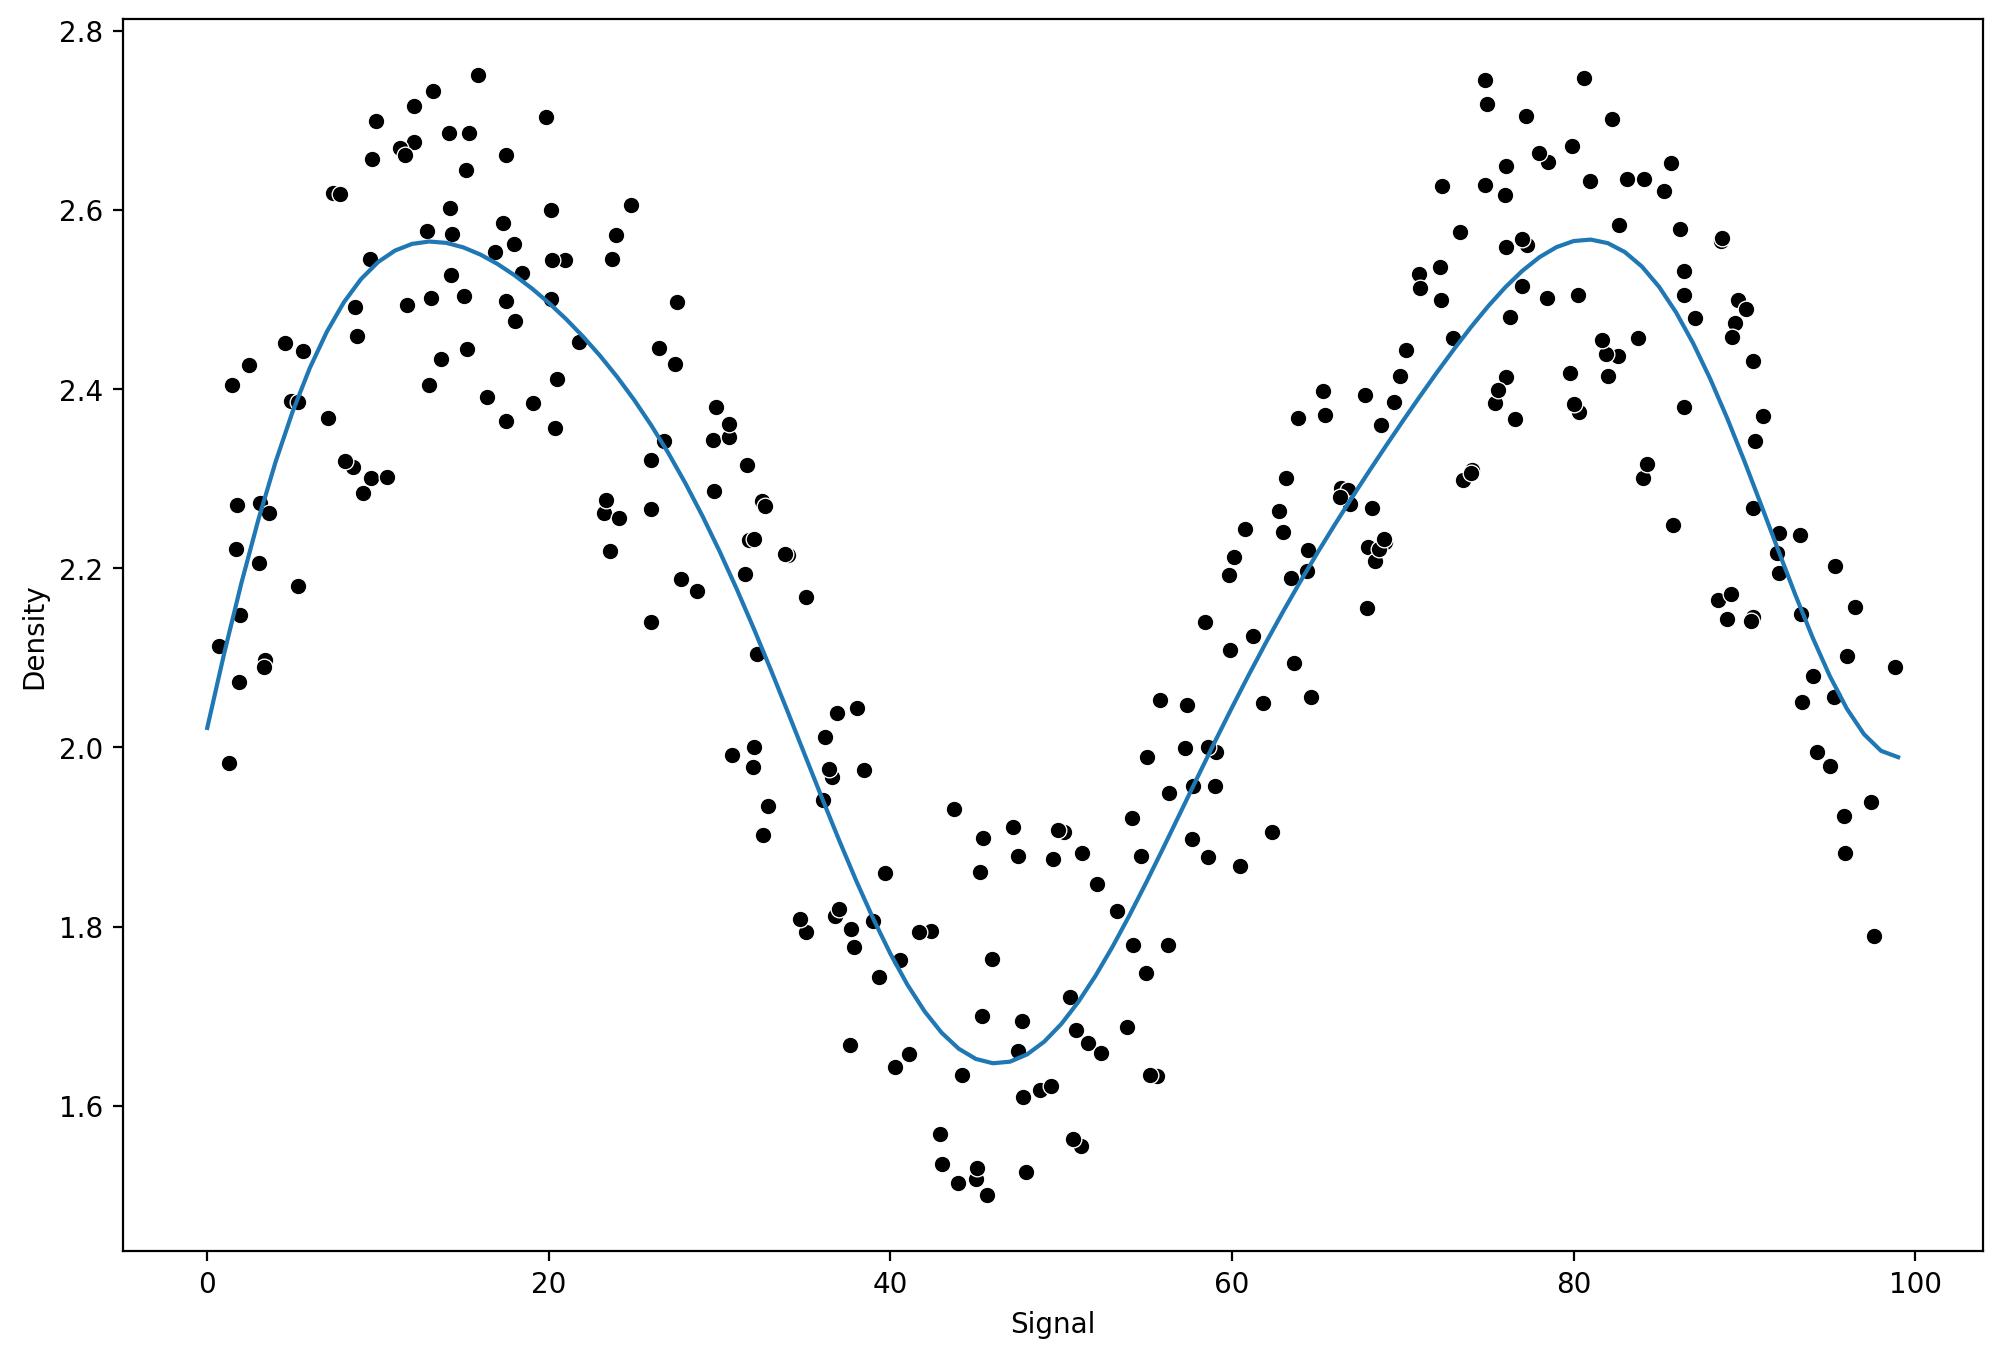

In [49]:
run_model(grid,X_train,y_train,X_test,y_test)

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfr = RandomForestRegressor(n_estimators=10)

MAE : 0.11550574941801466
RMSE : 0.1377157726348637


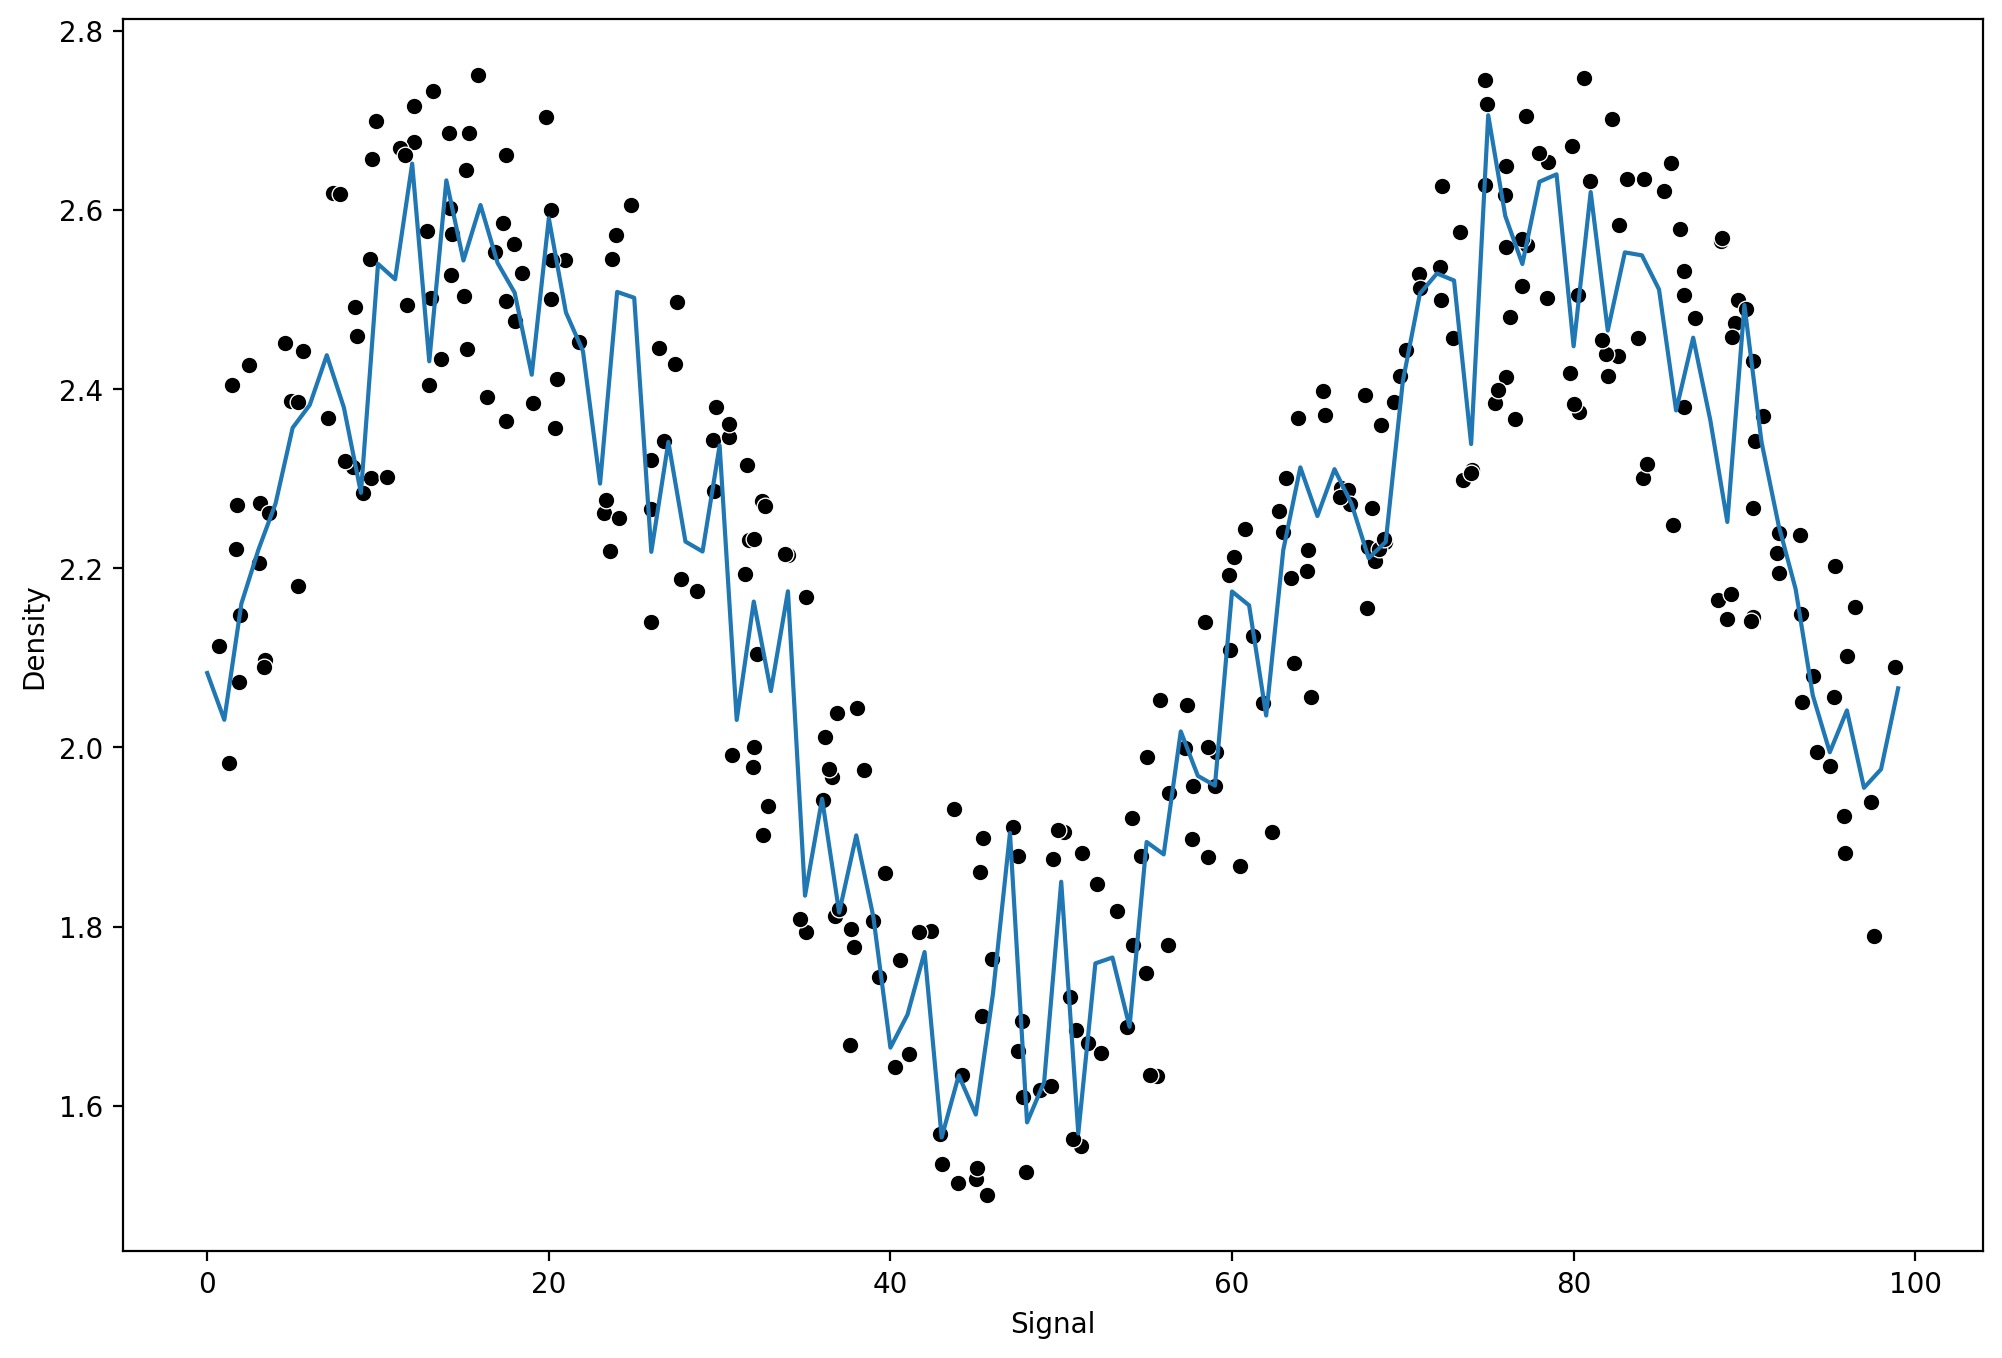

In [53]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [54]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [55]:
model = GradientBoostingRegressor()

MAE : 0.11318284854800689
RMSE : 0.13294148649584667


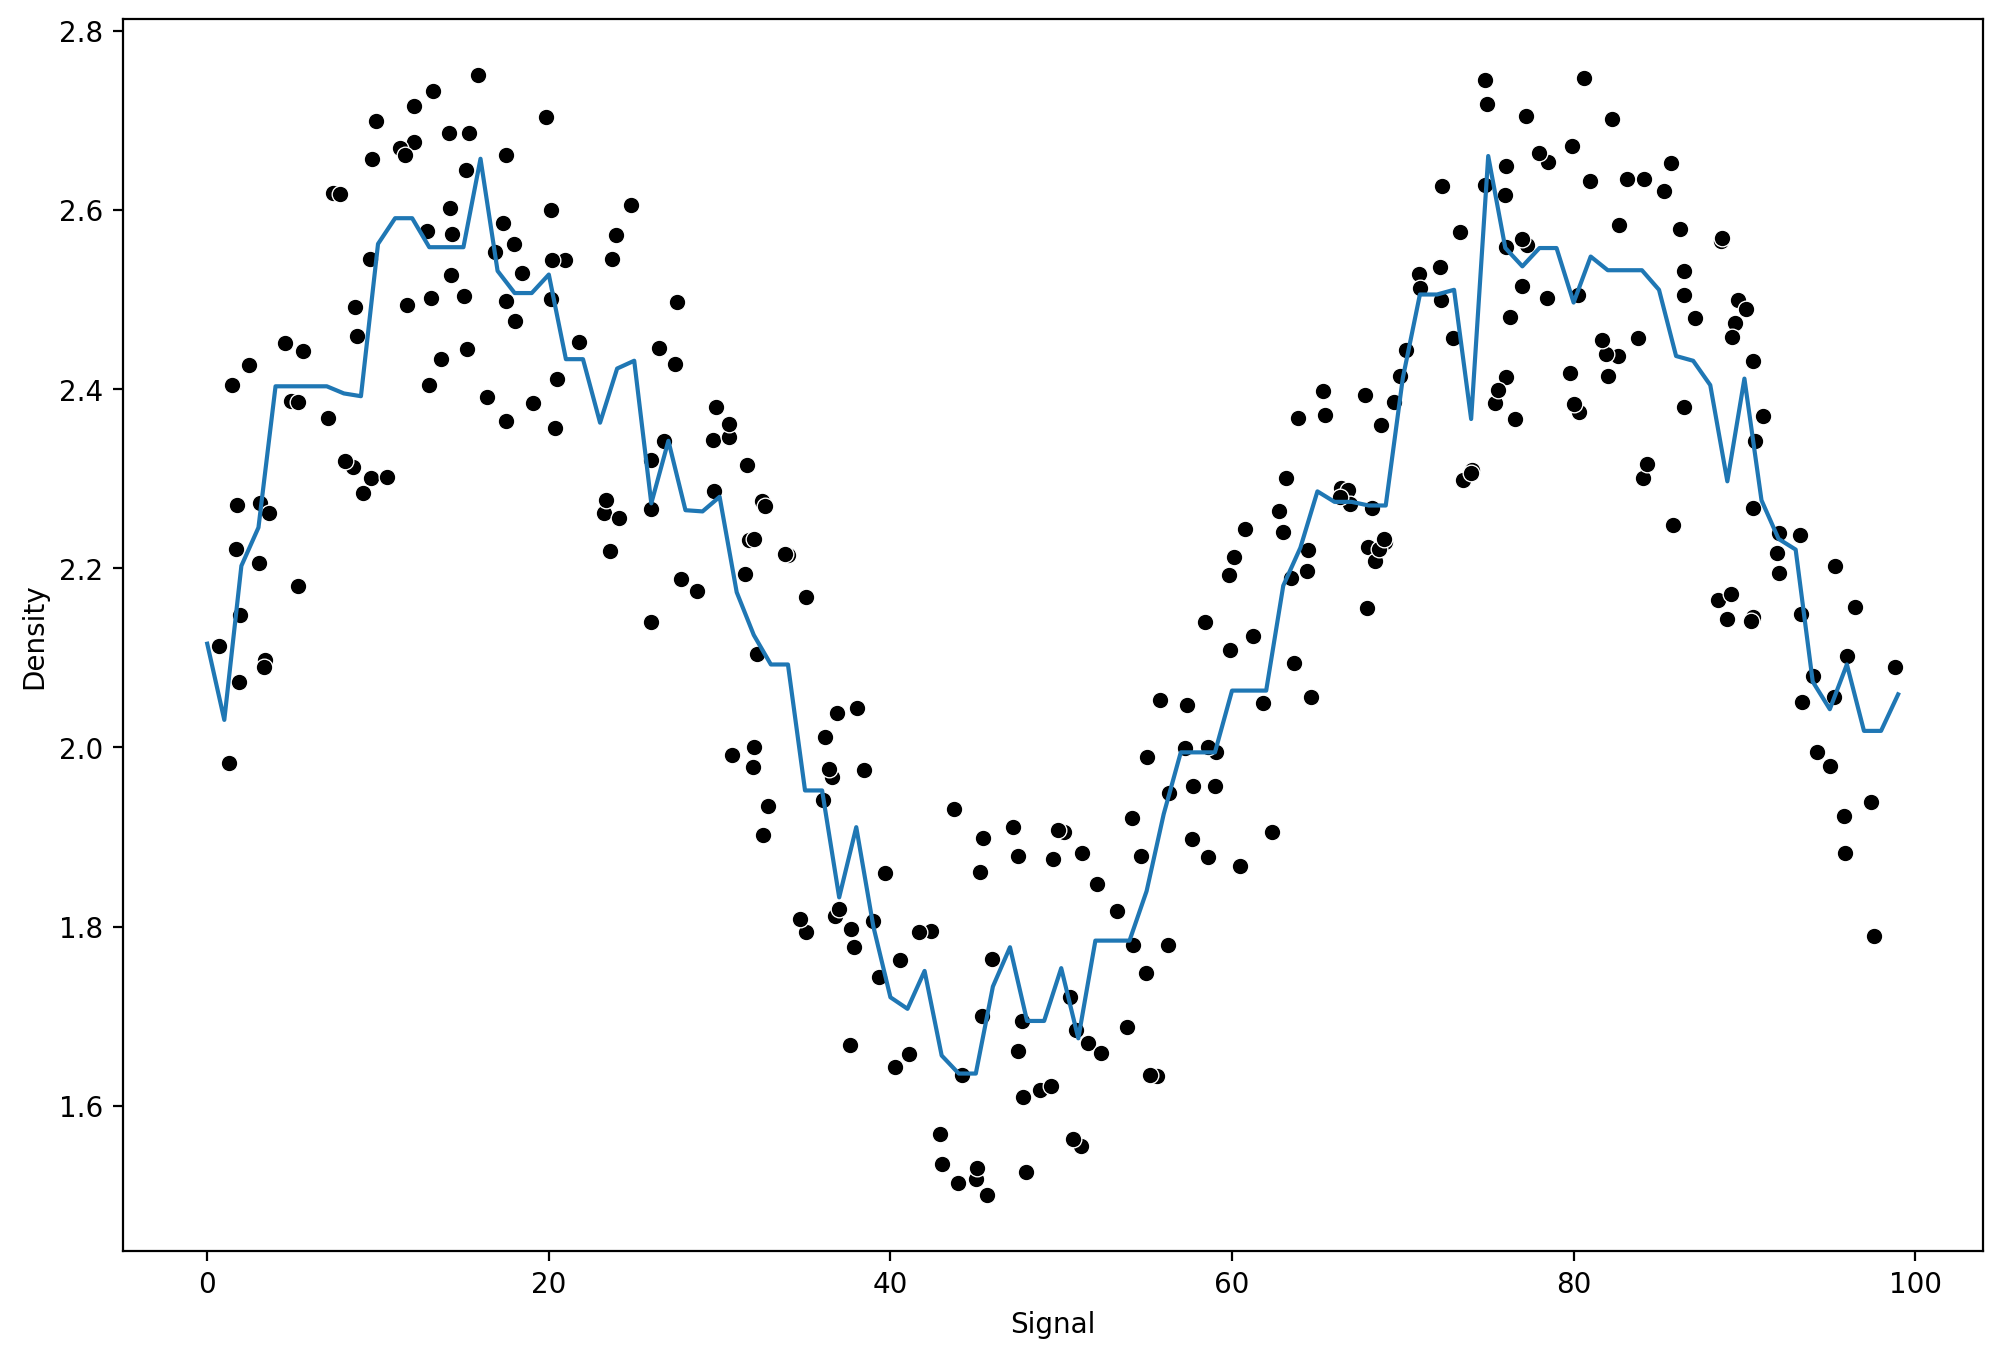

In [56]:
run_model(model,X_train,y_train,X_test,y_test)

In [57]:
model = AdaBoostRegressor()

MAE : 0.11886642737078829
RMSE : 0.14257743966532038


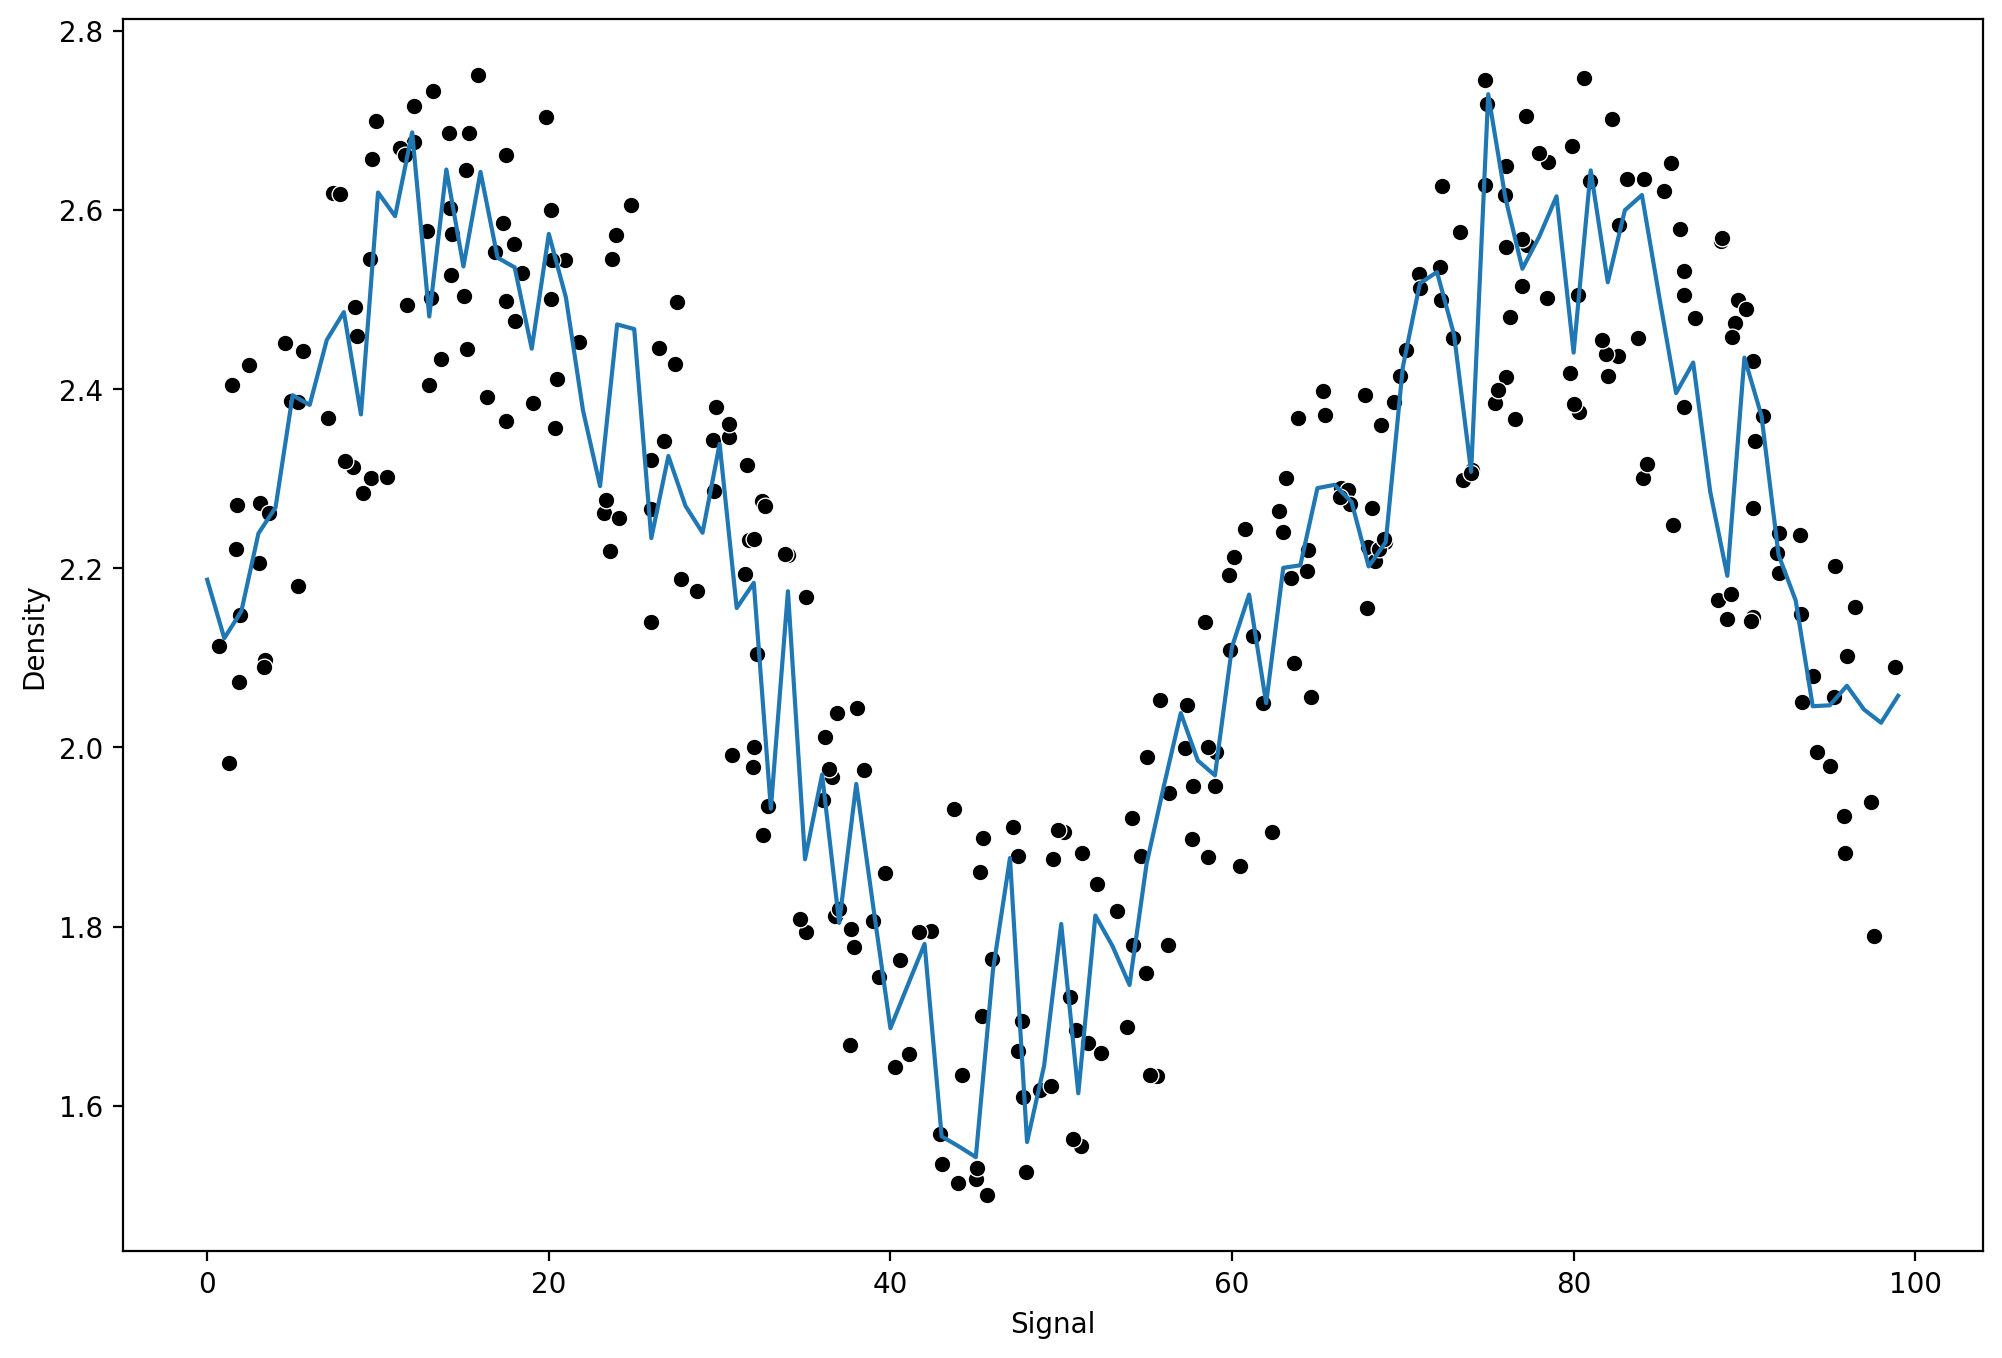

In [58]:
run_model(rfr,X_train,y_train,X_test,y_test)